# Laboratory Session 06 : May 19, 2022
# Exercises due on : June 5, 2022

## Student: Capodaglio Alessandro Maria
## ID: 2039109

# Exercise 1

### a) what is the probability distribution of y, the number of times the new method fails to detect the disease ?
The new method can either fail or not fail, the distribution is a binomial distribution. If p is the probability that the test fails and y is the number of times the test fails in n trials the distribution is: 
$$ \text{Bin}(y|n,p) = {n\choose y} p^y(1-p)^{n-y} $$

### b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?
The frequentist estimator for p is: 
$$ \hat{p} = \frac{y}{n} = \frac{6}{75}$$

### c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance


 The mean for the posterior is  0.085 
 The standard deviation for the posterior is  0.031 
 The variance for the posterior is  0.00095 

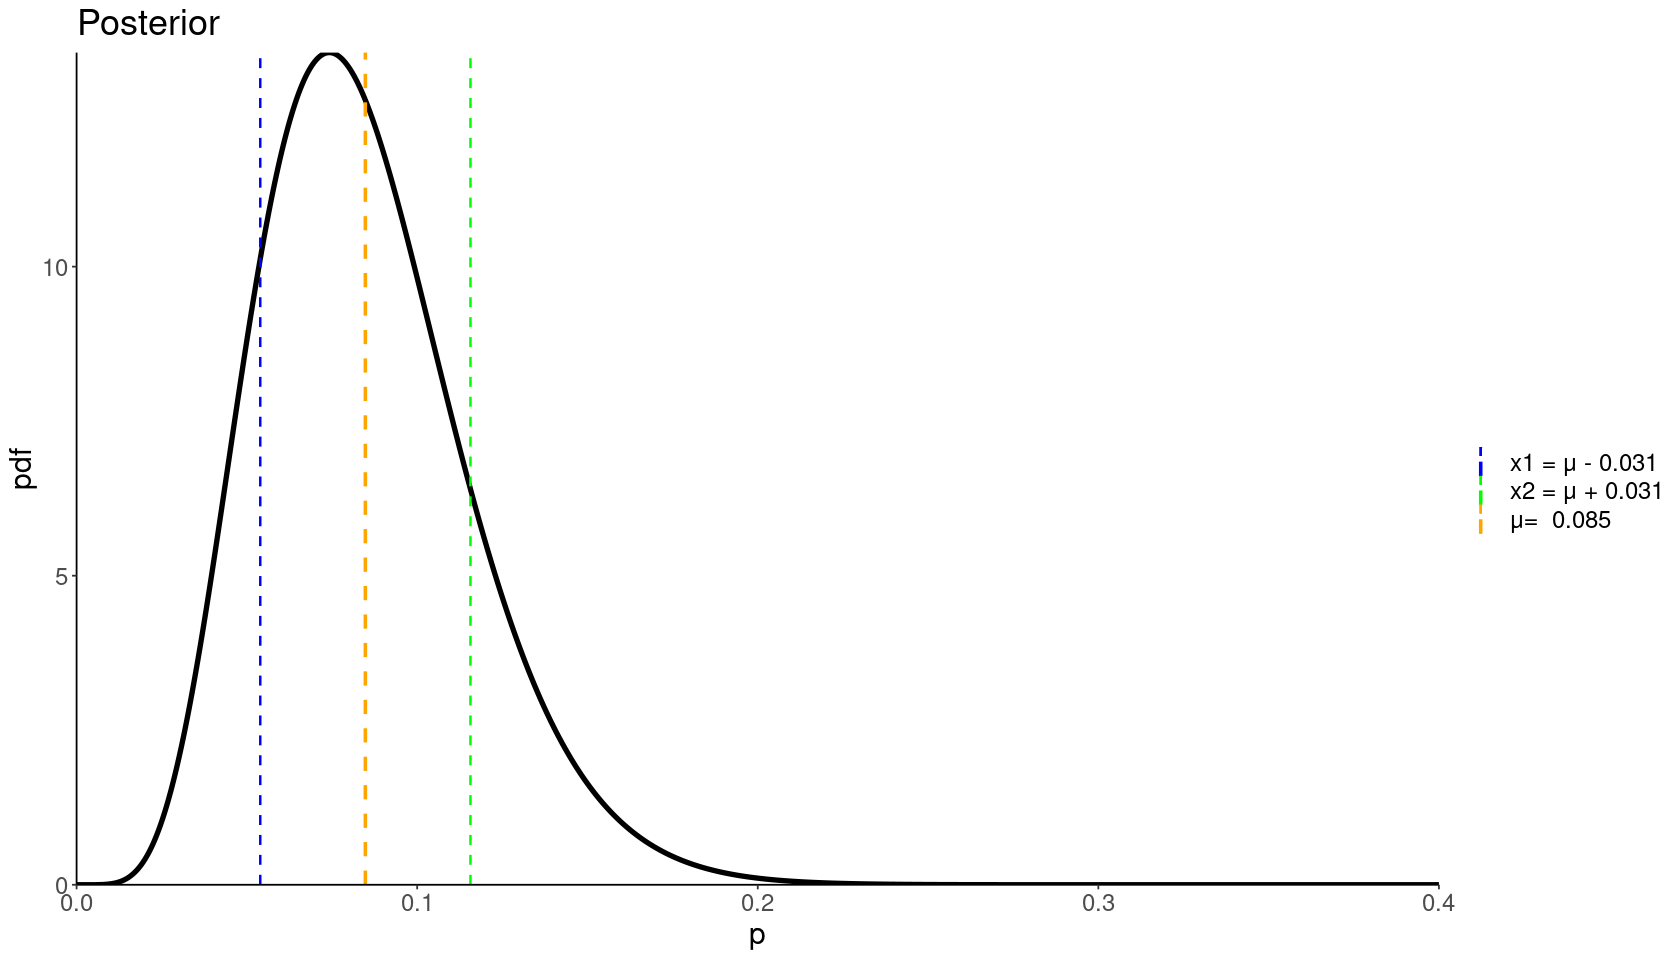

In [1]:
library("ggplot2")


n <- 75 #number of patients
y <- 6 # false negative

m_prior <- 0.15
sd_prior <- 0.14

#Since we're dealing with a binomial likelyhood and a beta prior, the posterior is still a beta

#In order to proceed we need to calculate the beta prior parameters starting from the mean and the variance, this
#takes quite a few algebraic steps, but amounts to the following formulas: 

a_prior <- m_prior*((m_prior*(1-m_prior)/sd_prior**2)-1)
b_prior <- (1-m_prior)*((m_prior*(1-m_prior)/sd_prior**2)-1)

# The posterior parameters are then: 


a_post <- a_prior + y
b_post <- b_prior + n - y


m_post <- a_post/(a_post + b_post)

sd_post <- sqrt((a_post*b_post)/((a_post+b_post)**2 * (a_post+b_post+1)))


p <- seq(0,0.40,length.out = 1000)

options(repr.plot.width = 14, repr.plot.height = 8)

df_prob <- data.frame(x = p, prior = dbeta(p,a_prior, b_prior), post = dbeta(p, a_post, b_post))


plot <- ggplot()+
        ggtitle('Posterior')+
        geom_line(aes(x = df_prob[, 1], y = df_prob[, 3]), size = 1.5)+
        geom_vline(aes(xintercept = m_post, colour = paste('μ= ', round(m_post,3))), linetype = 'dashed', size = 1) +
        geom_vline(aes(xintercept = m_post - sd_post, colour = paste('x1 = μ -', round(sd_post,3))), linetype = 'dashed', size = 0.7) +
        geom_vline(aes(xintercept =  m_post + sd_post, colour = paste('x2 = μ +', round(sd_post,3))), linetype = 'dashed', size = 0.7) +
        theme_classic()+
        theme(text = element_text(size = 18))+
        scale_x_continuous(name = 'p', expand = c(0,0))+
        scale_y_continuous(name = 'pdf', expand = c(0,0))+
        scale_color_manual(values = c('Blue', 'Green', 'Orange'), name = "")

        

cat(paste('\n The mean for the posterior is ', round(m_post, 3)), "")
cat(paste('\n The standard deviation for the posterior is ', round(sd_post, 3)), "")
cat(paste('\n The variance for the posterior is ', round(sd_post**2, 5)), "")


plot

### d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.
### &
### e) Perform the same hypothesis test in the classical frequentist way.


 With the bayesian approach, we reject the null hypothesis at a significance level of 0.05, because the found p-value is smaller than 0.05.
 With the frequentist approach, we FAIL to reject the null hypothesis at a significance level of 0.05, because the found p-value is greater than 0.05.

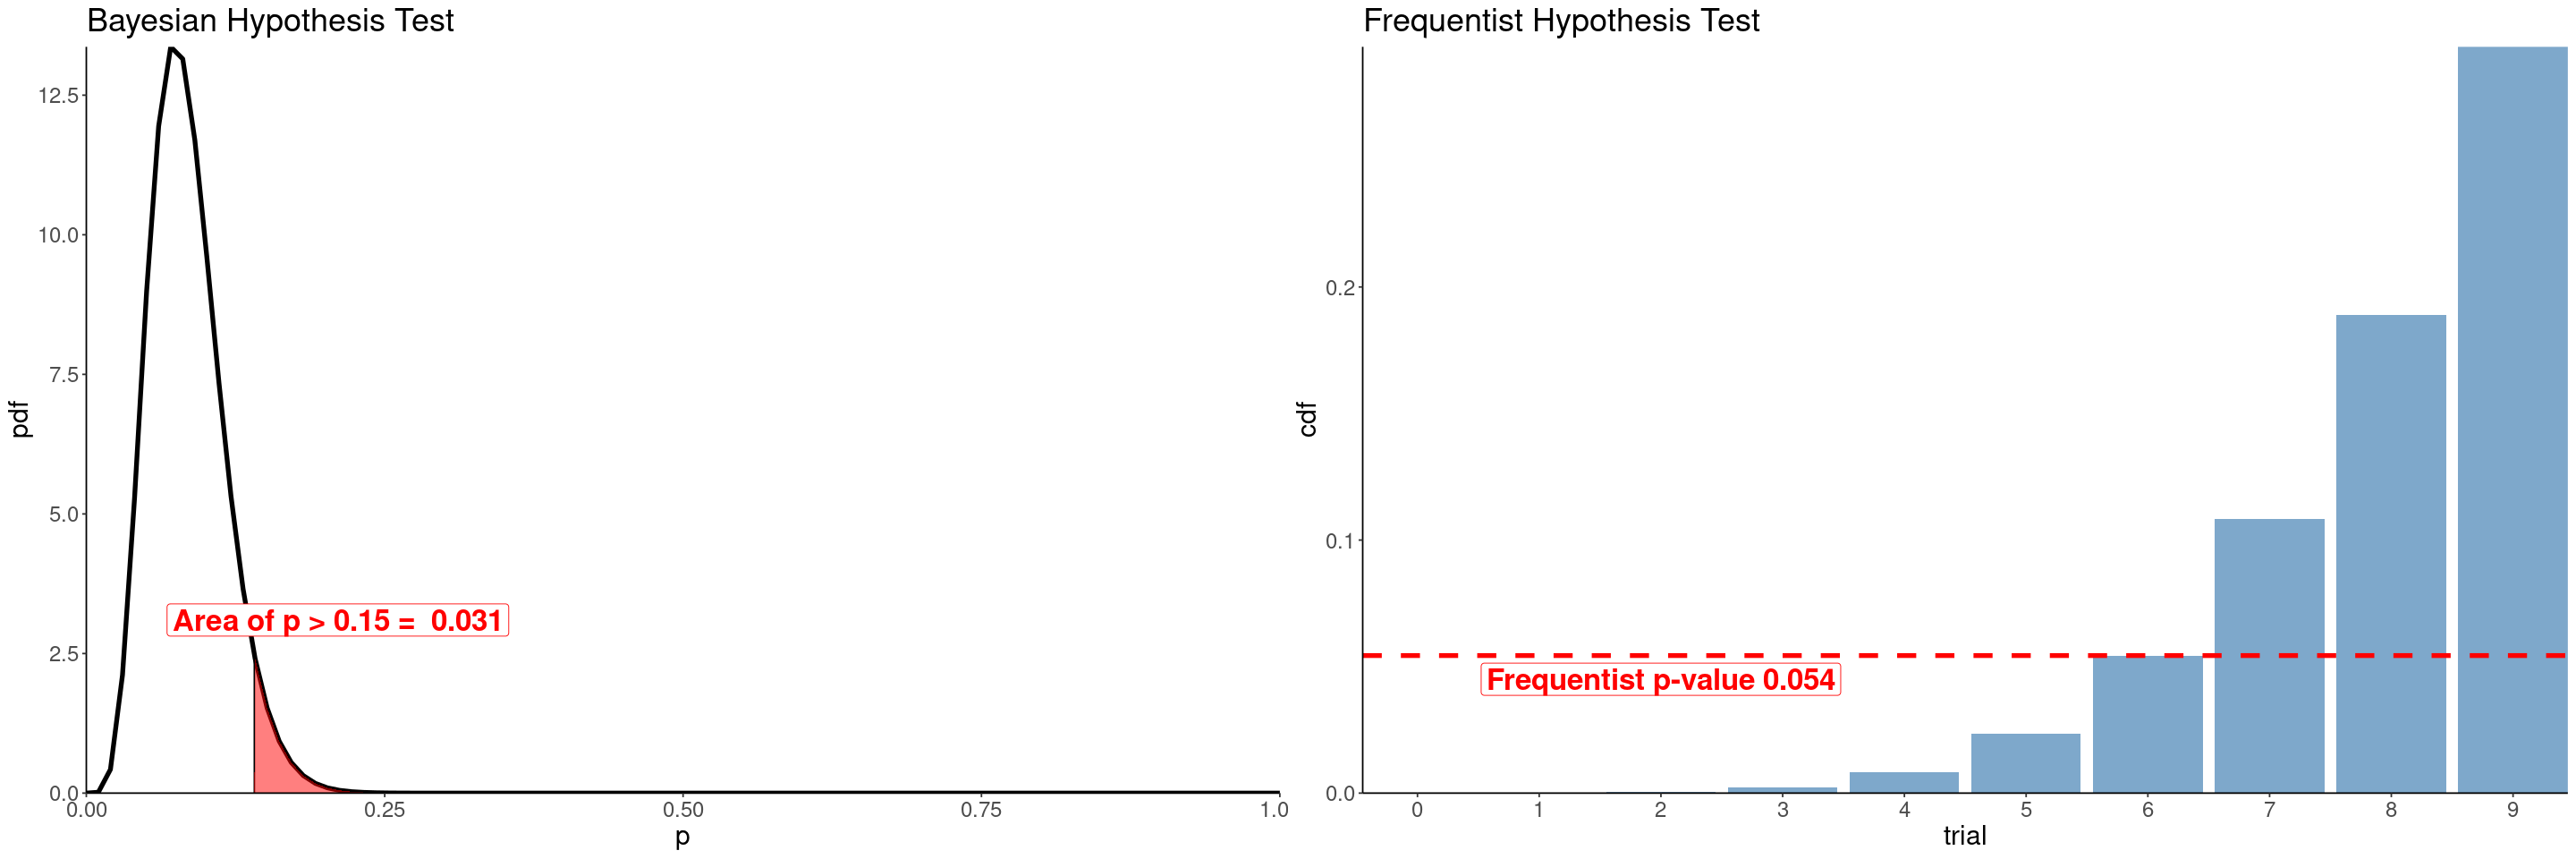

In [2]:
library("ggpubr")

tail_bayes <- qbeta(0.95, a_post,b_post)
p_value_bayes <- pbeta(0.15, a_post, b_post, lower.tail = FALSE)

p_value_freq <- pbinom(q = y, size = n, prob = 0.15)
cutoff_freq <- qbinom(p = 0.05, size = n, prob = 0.15)

pp <- seq(0,1,length.out = 100)
trials <- seq(0, n, len = n + 1)



df_prob1 <- data.frame(x = pp, post = dbeta(pp, a_post, b_post))

df_prob2 <- data.frame(trial = trials, cdf = pbinom(q = trials, size = n, prob = 0.15))



shade <- rbind(c(tail_bayes,0), subset(df_prob1, x > tail_bayes), c(df_prob1[nrow(df_prob1), "X"], 0))

options(repr.plot.width = 24, repr.plot.height = 8)




annotation <- data.frame(
   x = tail_bayes+0.07,
   y = 2.5 +0.6,
   label = paste('Area of p > 0.15 = ', round(p_value_bayes,3))
)

annotation_freq <- data.frame(
   x = 2,
   y = 0.045,
   label = paste('Frequentist p-value', round(p_value_freq,3))
)


cat('\n With the bayesian approach, we reject the null hypothesis at a significance level of 0.05, because the found p-value is smaller than 0.05.')

cat('\n With the frequentist approach, we FAIL to reject the null hypothesis at a significance level of 0.05, because the found p-value is greater than 0.05.')


plot1 <- ggplot()+
        ggtitle('Bayesian Hypothesis Test')+
        geom_line(aes(x = df_prob1[, 1], y = df_prob1[, 2]), size = 1.5)+
        geom_segment(aes(x=tail_bayes,y=0,xend=tail_bayes, yend =dbeta(tail_bayes, a_post, b_post))) +
        geom_polygon(data = shade, aes(x = shade[,1], y = shade[,2]), fill="red", alpha = 0.5)+
        theme_classic()+
        theme(text = element_text(size = 18))+
        scale_x_continuous(name = 'p', expand = c(0,0))+
        scale_y_continuous(name = 'pdf', expand = c(0,0))+
        geom_label(data=annotation, aes( x=x, y=y, label=label),                 , 
           color="red", 
           size=7 , angle=0, fontface="bold" )
        


plot2 <- ggplot(data=df_prob2[1:10,], aes(x=trial, y=cdf))+
        ggtitle('Frequentist Hypothesis Test')+
        geom_bar(stat="identity", fill="steelblue", alpha = 0.7)+
        geom_hline(aes(yintercept = p_value_freq), size = 1.5, color = 'red', linetype = 'dashed')+
        theme_classic()+
        scale_x_continuous(name = 'trial', expand = c(0,0), breaks = c(0,1,2,3,4,5,6,7,8,9,10))+
        scale_y_continuous(name = 'cdf', expand = c(0,0))+
        theme(text = element_text(size = 18))+
        geom_label(data=annotation_freq, aes( x=x, y=y, label=label),                 , 
           color="red", 
           size=7 , angle=0, fontface="bold" )

ggarrange(plot1, plot2, nrow = 1, ncol = 2)


# Exercise 2

### (a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.
### &
### (b) assuming now a Jeffreys’ prior,√g(λ) ∝ 1/ λ , with λ > 0 compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.


-------------------UNIFORM PRIOR N1-------------------------
 The median of the posterior with uniform prior is  0.613334138689371 
 The mean  for the posterior with uniform prior is  0.615 
 The variance  for the posterior with uniform prior is  0.003075 
 
 
-------------------JEFFREY'S PRIOR N1-------------------------
 The median of the posterior with jeffrey's prior is  0.61083414198632 
 The mean for the posterior with jeffrey's prior is  0.6125 
 The variance for the posterior with jeffrey's prior is  0.0030625 

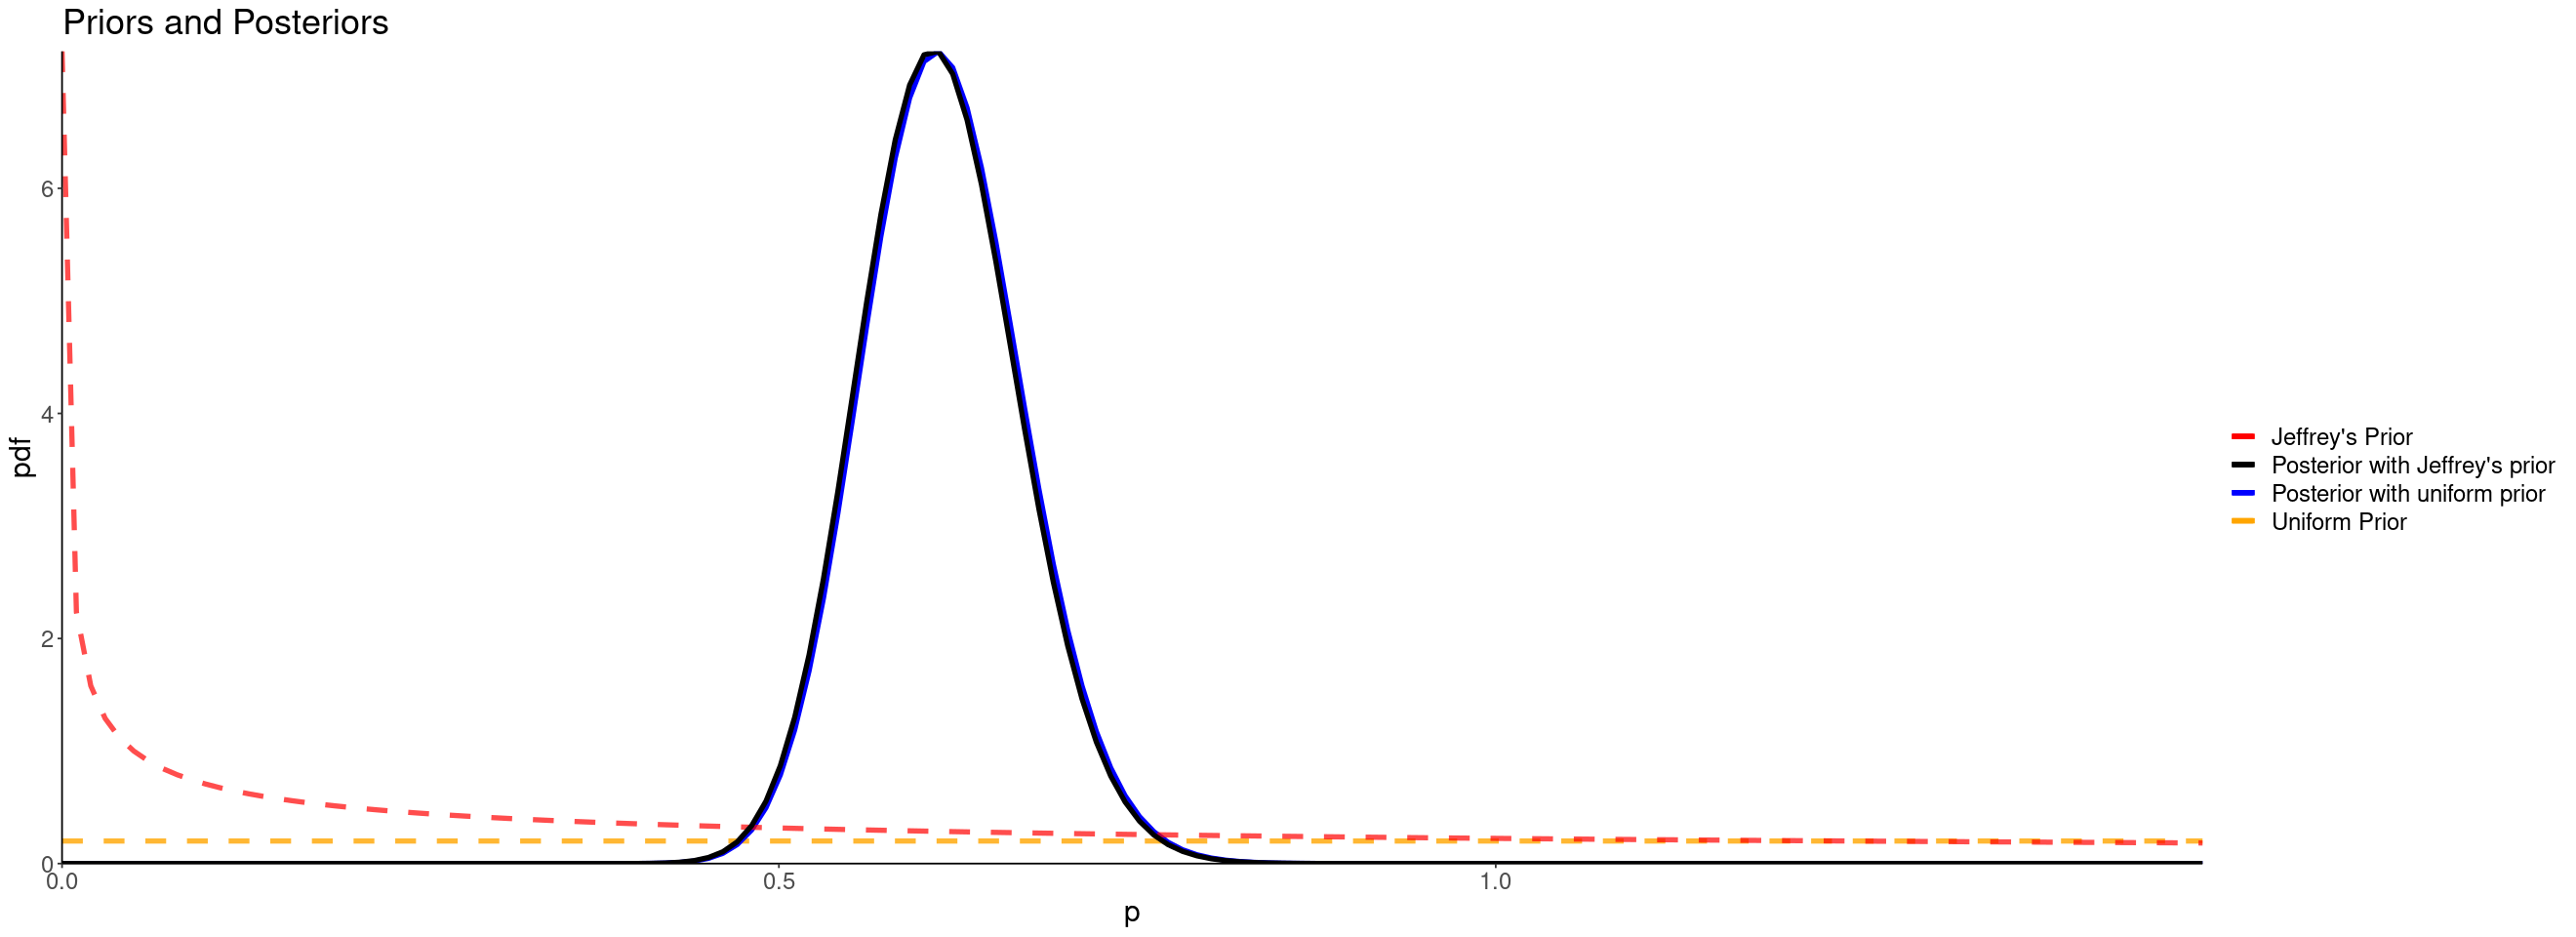

In [3]:
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)
len1 <- sum(n1)
len2 <- sum(n2)

death_occurence <- c(0, 1, 2, 3, 4)


p_step <- 0.002
p <- seq(0,5, length.out = 1/p_step)



#-------------UNIFORM PRIOR--------------#

prior_unif <- function(x){
    return (dunif(x, 0,5))   
}


alpha_unif <- sum(n1*death_occurence)+1

post_unif <- function(x){
    return (dgamma(x, shape = alpha_unif, rate = len1))
}



#-------------JEFFREY'S PRIOR--------------#

prior_jeff <- function(p){
    normalize <- integrate(function(p){1/sqrt(p)}, lower = 0, upper = 5)$value
    return ((1/sqrt(p))/normalize)
}


alpha_jeff <- sum(n1*death_occurence)+1/2

post_jeff <- function(x){
    return (dgamma(x, shape = alpha_jeff, rate = len1))
}




#-------------PLOT--------------#



df_prob  <- data.frame(x = p, prior_unif(p), uni = post_unif(p), prior_jeff(p), jef = post_jeff(p))
options(repr.plot.width=22, repr.plot.height=8)

plot <-  ggplot() +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=p[1:150], y= df_prob[1:150,2],colour= 'Uniform Prior'), linetype ='dashed', size = 1.5, alpha = 0.8) +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=p[1:150], y= df_prob[1:150,3],colour= 'Posterior with uniform prior'), size = 1.5) +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=p[1:150], y= df_prob[1:150,4],colour= 'Jeffrey\'s Prior'), linetype ='dashed', size = 1.5, alpha = 0.7) +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=p[1:150], y= df_prob[1:150,5],colour= 'Posterior with Jeffrey\'s prior'), size = 1.5) +
            ggtitle('Priors and Posteriors')+
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "black", "blue", "orange"),name = "")




plot

#-------------QUANTITIES OF INTEREST--------------#


unif_median <- qgamma(0.5, shape = alpha_unif, rate = len1)
unif_mean_the<- alpha_unif/len1
unif_var_the <- alpha_unif/(len1**2)

jeff_median <- qgamma(0.5, shape = alpha_jeff, rate = len1)
jeff_mean_the<- alpha_jeff/len1
jeff_var_the <- alpha_jeff/(len1**2)

cat('\n-------------------UNIFORM PRIOR N1-------------------------')
cat(paste('\n The median of the posterior with uniform prior is ', unif_median), "")
cat(paste('\n The mean  for the posterior with uniform prior is ', unif_mean_the), "")
cat(paste('\n The variance  for the posterior with uniform prior is ', unif_var_the), "")

cat('\n\ \n \n-------------------JEFFREY\'S PRIOR N1-------------------------')
cat(paste('\n The median of the posterior with jeffrey\'s prior is ', jeff_median), "")
cat(paste('\n The mean for the posterior with jeffrey\'s prior is ', jeff_mean_the), "")
cat(paste('\n The variance for the posterior with jeffrey\'s prior is ', jeff_var_the), "")






 The 95% C.I  for the posterior given a uniform prior is : [ 0.511 , 0.728 ]
 The 95% C.I for the posterior given Jeffrey's prior is : [ 0.509 , 0.726 ]

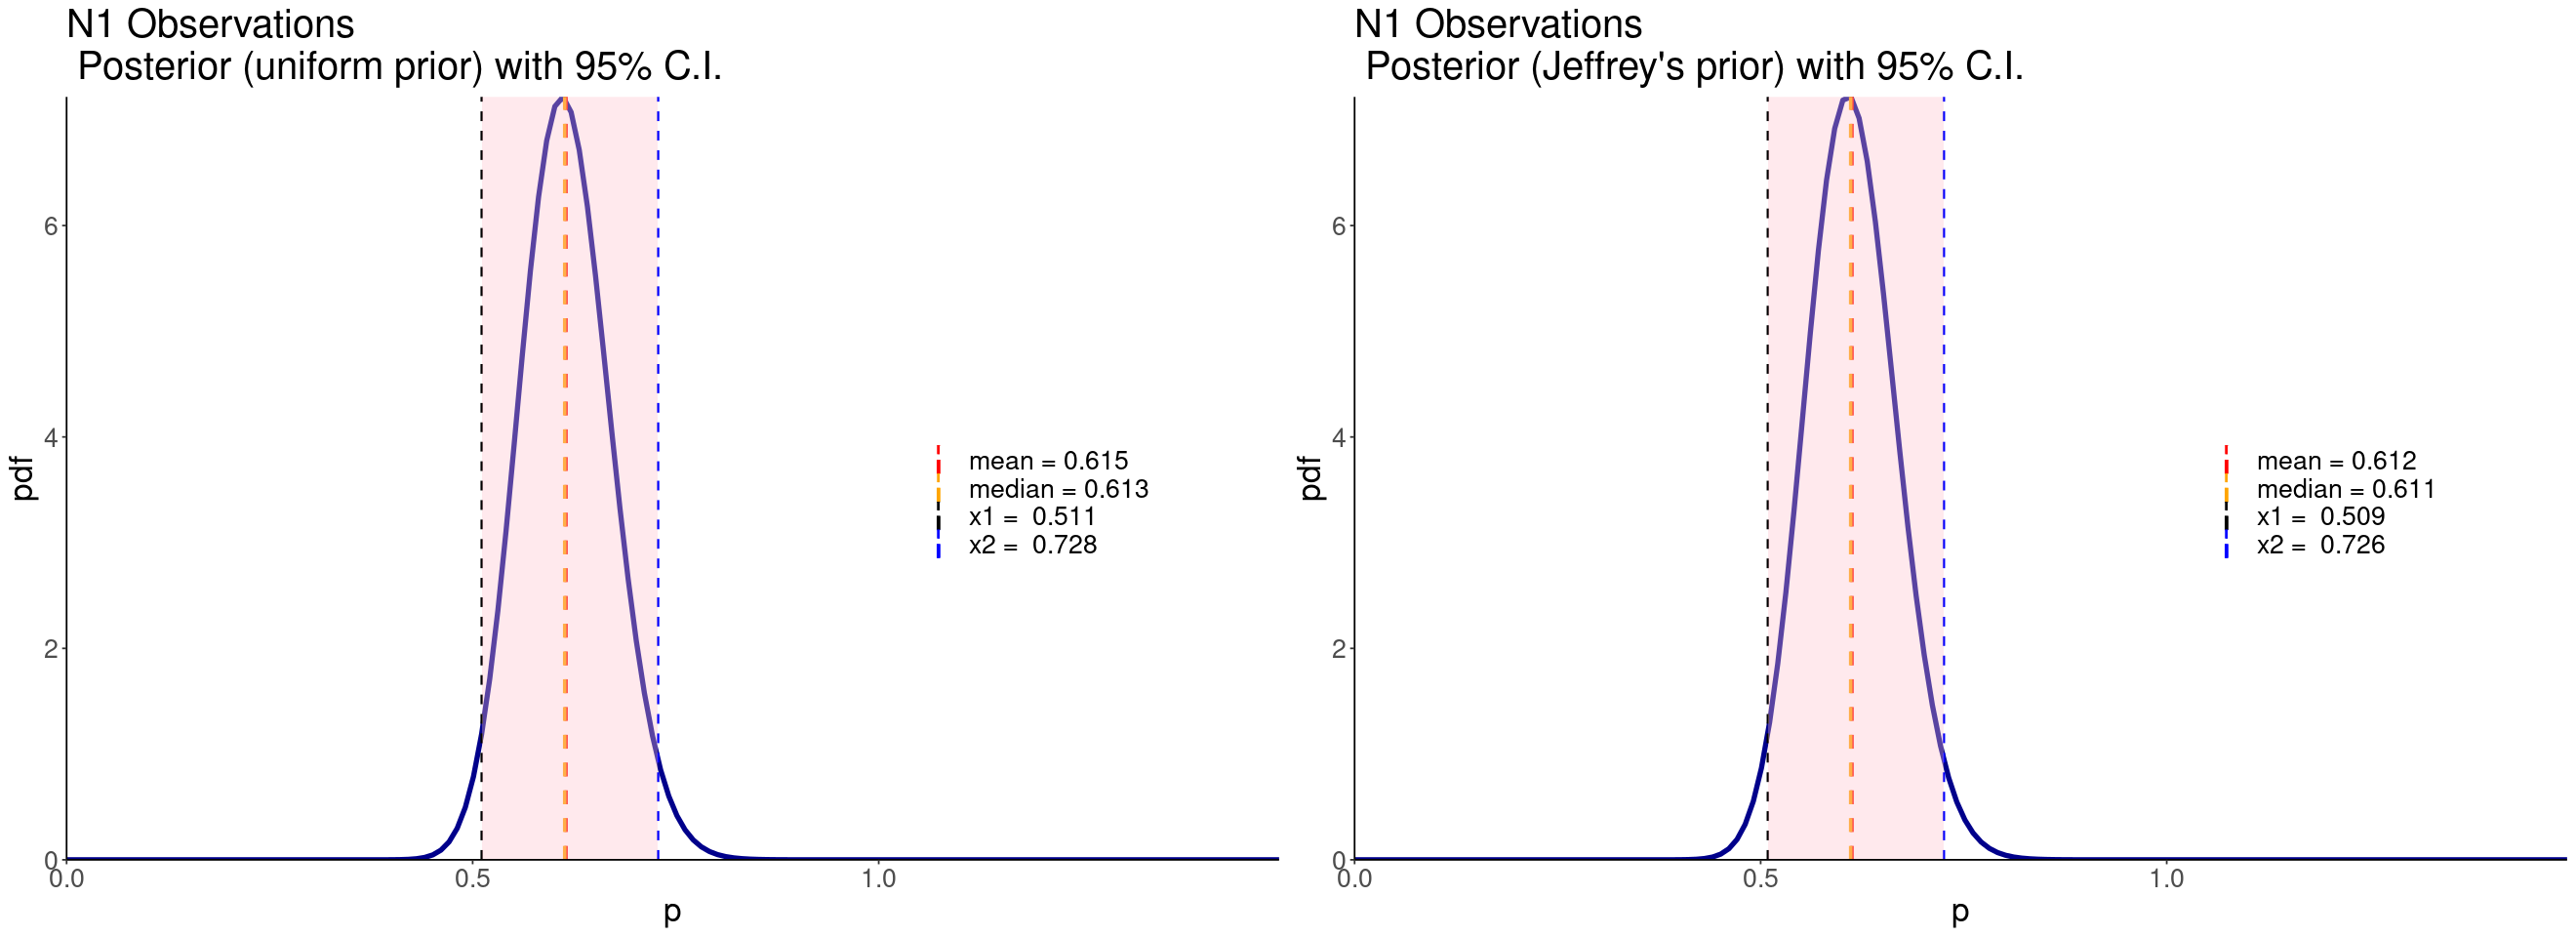

In [4]:
library("ggplot2")
library("ggpubr")


limits <- function(q, alpha, n){
    lower <- qgamma(q, shape = alpha, rate = n)
    upper <- qgamma(1-q, shape = alpha, rate = n)
    return(c(lower, upper))
}

q = 0.025 # quantile for two tailed 95% C.I

unif_cutoffs <- limits(0.025,alpha_unif,len1)
jeff_cutoffs <- limits(0.025,alpha_jeff,len1)


#-------------UNIFORM PRIOR CREDIBIILITY INTERVAL--------------#



unif_post_with_cred <-  ggplot() +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=x, y= uni), color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = unif_mean_the , colour = paste('mean =', round(unif_mean_the, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = unif_median , colour = paste('median =', round(unif_median, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = unif_cutoffs[1], colour = paste('x1 = ', round(unif_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = unif_cutoffs[2],  colour = paste('x2 = ', round(unif_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('N1 Observations \n Posterior (uniform prior) with 95% C.I.')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "black", "blue"),
                     name = "")+
            theme(legend.position=c(0.80, 0.5))+
            geom_ribbon(data = df_prob[1:150, ], aes(y = uni, xmax = unif_cutoffs[2],xmin = unif_cutoffs[1]), fill = 'pink', alpha = 0.35)


#-------------JEFFREY'S PRIOR CREDIBIILITY INTERVAL--------------#


jeff_post_with_cred <-  ggplot() +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=x, y = jef), color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = jeff_mean_the , colour = paste('mean =', round(jeff_mean_the, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = jeff_median , colour = paste('median =', round(jeff_median, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = jeff_cutoffs[1], colour = paste('x1 = ', round(jeff_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = jeff_cutoffs[2],  colour = paste('x2 = ', round(jeff_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('N1 Observations \n Posterior (Jeffrey\'s prior) with 95% C.I.')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "black", "blue"),
                     name = "")+
            theme(legend.position=c(0.80, 0.5))+
            geom_ribbon(data = df_prob[1:150, ], aes(y = jef, xmax = jeff_cutoffs[2],xmin = jeff_cutoffs[1]), fill = 'pink', alpha = 0.35)






cat(paste('\n The 95% C.I  for the posterior given a uniform prior is : [', round(unif_cutoffs[1],3),',', round(unif_cutoffs[2],3), ']'))
cat(paste('\n The 95% C.I for the posterior given Jeffrey\'s prior is : [', round(jeff_cutoffs[1],3),',', round(jeff_cutoffs[2],3), ']'))

ggarrange(unif_post_with_cred, jeff_post_with_cred, nrow = 1, ncol = 2)



-------------------UNIFORM PRIOR N2-------------------------
 The median of the posterior with uniform prior is  0.702381311150158 
 The mean  for the posterior with uniform prior is  0.703571428571429 
 The variance for the posterior with uniform prior is  0.00251275510204082 
 
 
-------------------JEFFREY'S PRIOR N2-------------------------
 The median of the posterior with jeffrey's prior is  0.700595597779037 
 The mean for the posterior with jeffrey's prior is  0.701785714285714 
 The variance  for the posterior with jeffrey's prior is  0.00250637755102041 

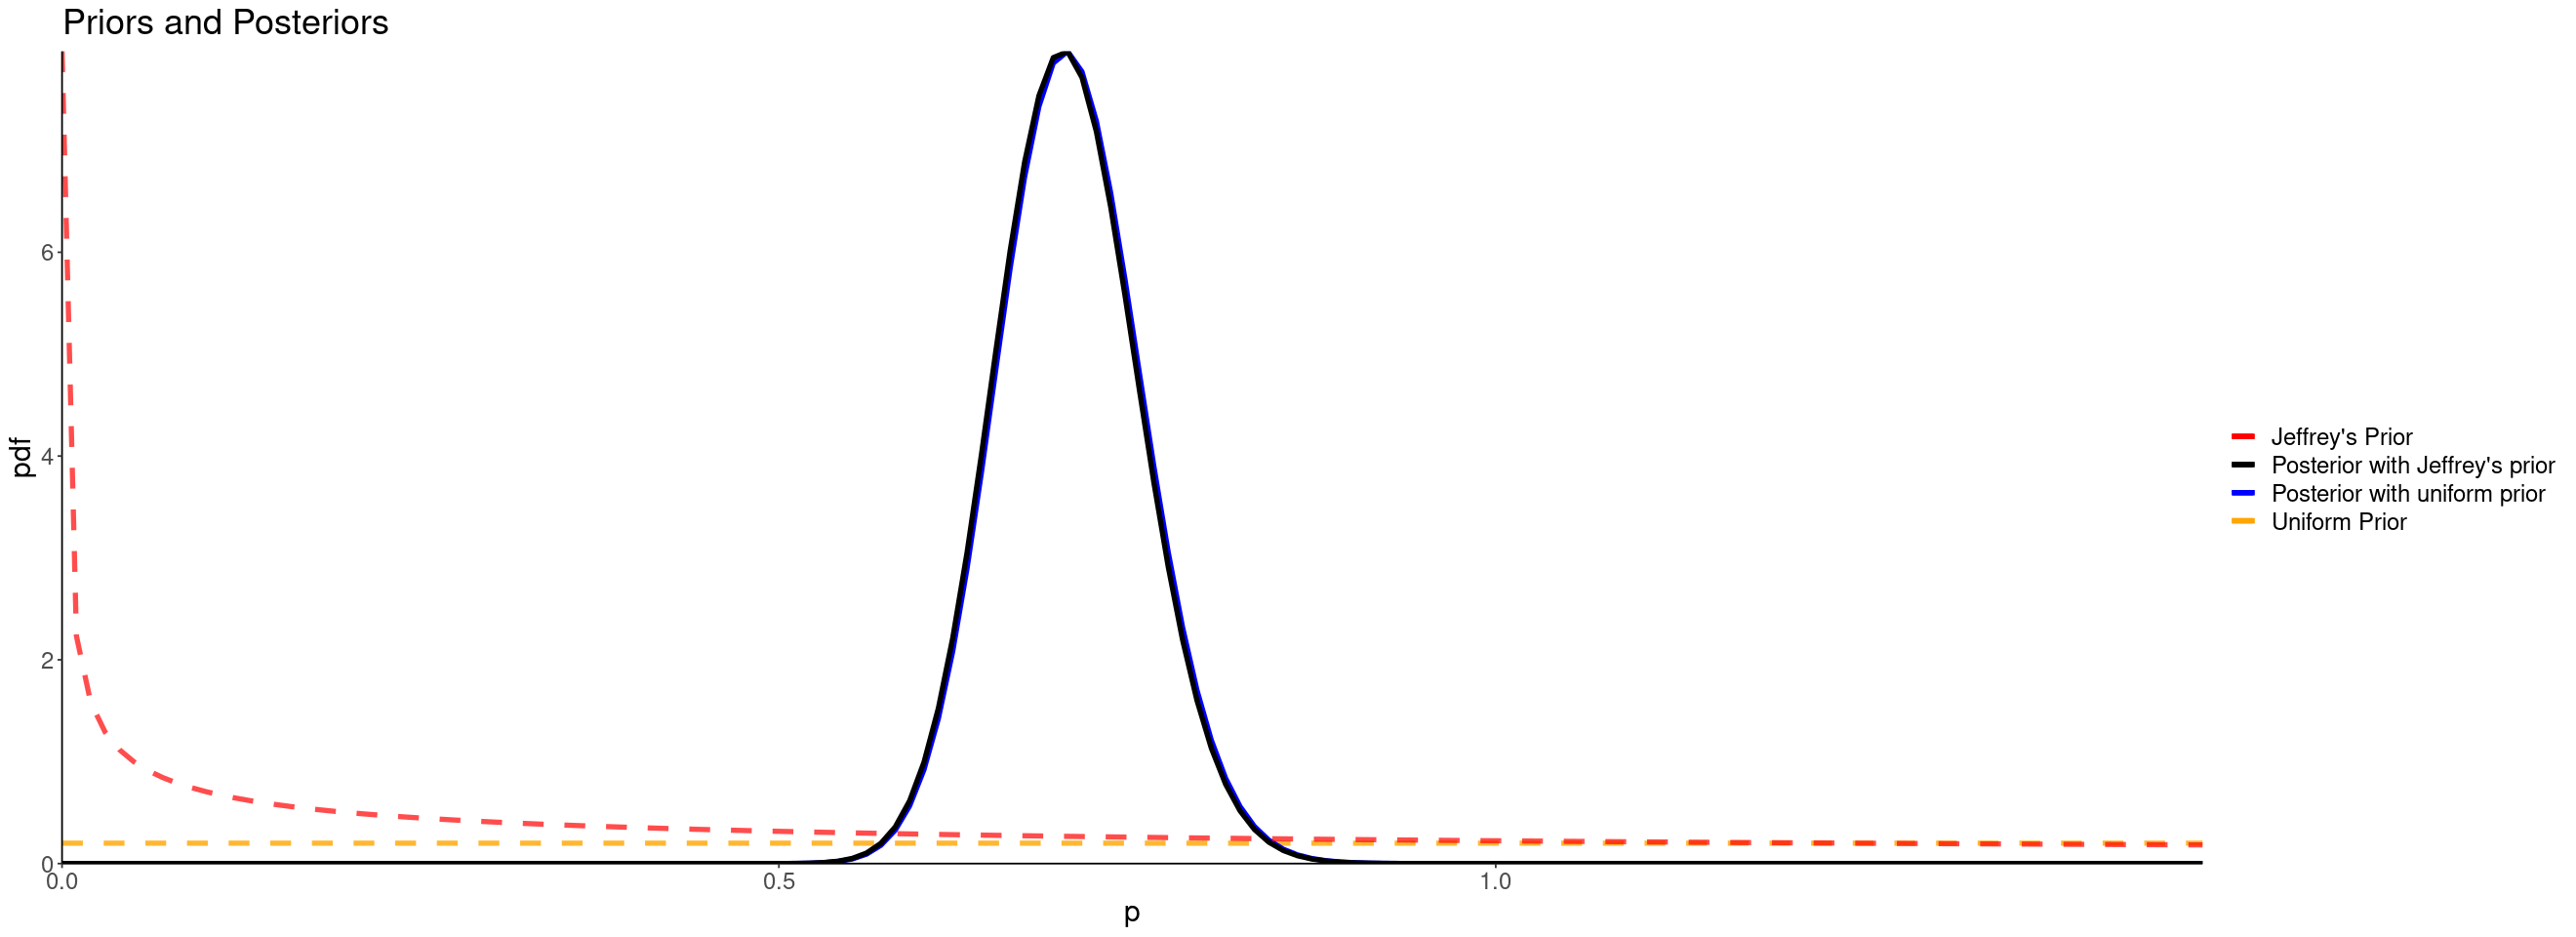

In [5]:
#-------------UNIFORM PRIOR--------------#

prior_unif <- function(x){
    return (dunif(x, 0,5))   
}


alpha_unif <- sum(n2*death_occurence)+1

post_unif <- function(x){
    return (dgamma(x, shape = alpha_unif, rate = len2))
}



#-------------JEFFREY'S PRIOR--------------#

prior_jeff <- function(p){
    normalize <- integrate(function(p){1/sqrt(p)}, lower = 0, upper = 5)$value
    return ((1/sqrt(p))/normalize)
}


alpha_jeff <- sum(n2*death_occurence)+1/2

post_jeff <- function(x){
    return (dgamma(x, shape = alpha_jeff, rate = len2))
}




#-------------PLOT--------------#



df_prob  <- data.frame(x = p, prior_unif(p), uni = post_unif(p), prior_jeff(p), jef = post_jeff(p))
options(repr.plot.width=22, repr.plot.height=8)

plot <-  ggplot() +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=p[1:150], y= df_prob[1:150,2],colour= 'Uniform Prior'), linetype ='dashed', size = 1.5, alpha = 0.8) +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=p[1:150], y= df_prob[1:150,3],colour= 'Posterior with uniform prior'), size = 1.5) +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=p[1:150], y= df_prob[1:150,4],colour= 'Jeffrey\'s Prior'), linetype ='dashed', size = 1.5, alpha = 0.7) +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=p[1:150], y= df_prob[1:150,5],colour= 'Posterior with Jeffrey\'s prior'), size = 1.5) +
            ggtitle('Priors and Posteriors')+
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "black", "blue", "orange"),name = "")




plot

#-------------QUANTITIES OF INTEREST--------------#


unif_median <- qgamma(0.5, shape = alpha_unif, rate = len2)
unif_mean_the<- alpha_unif/len2
unif_var_the <- alpha_unif/(len2**2)

jeff_median <- qgamma(0.5, shape = alpha_jeff, rate = len2)
jeff_mean_the<- alpha_jeff/len2
jeff_var_the <- alpha_jeff/(len2**2)

cat('\n-------------------UNIFORM PRIOR N2-------------------------')
cat(paste('\n The median of the posterior with uniform prior is ', unif_median), "")
cat(paste('\n The mean  for the posterior with uniform prior is ', unif_mean_the), "")
cat(paste('\n The variance for the posterior with uniform prior is ', unif_var_the), "")

cat('\n\ \n \n-------------------JEFFREY\'S PRIOR N2-------------------------')
cat(paste('\n The median of the posterior with jeffrey\'s prior is ', jeff_median), "")
cat(paste('\n The mean for the posterior with jeffrey\'s prior is ', jeff_mean_the), "")
cat(paste('\n The variance  for the posterior with jeffrey\'s prior is ', jeff_var_the), "")


 The 95% C.I  for the posterior given a uniform prior is : [ 0.609 , 0.805 ]
 The 95% C.I for the posterior given Jeffrey's prior is : [ 0.607 , 0.803 ]

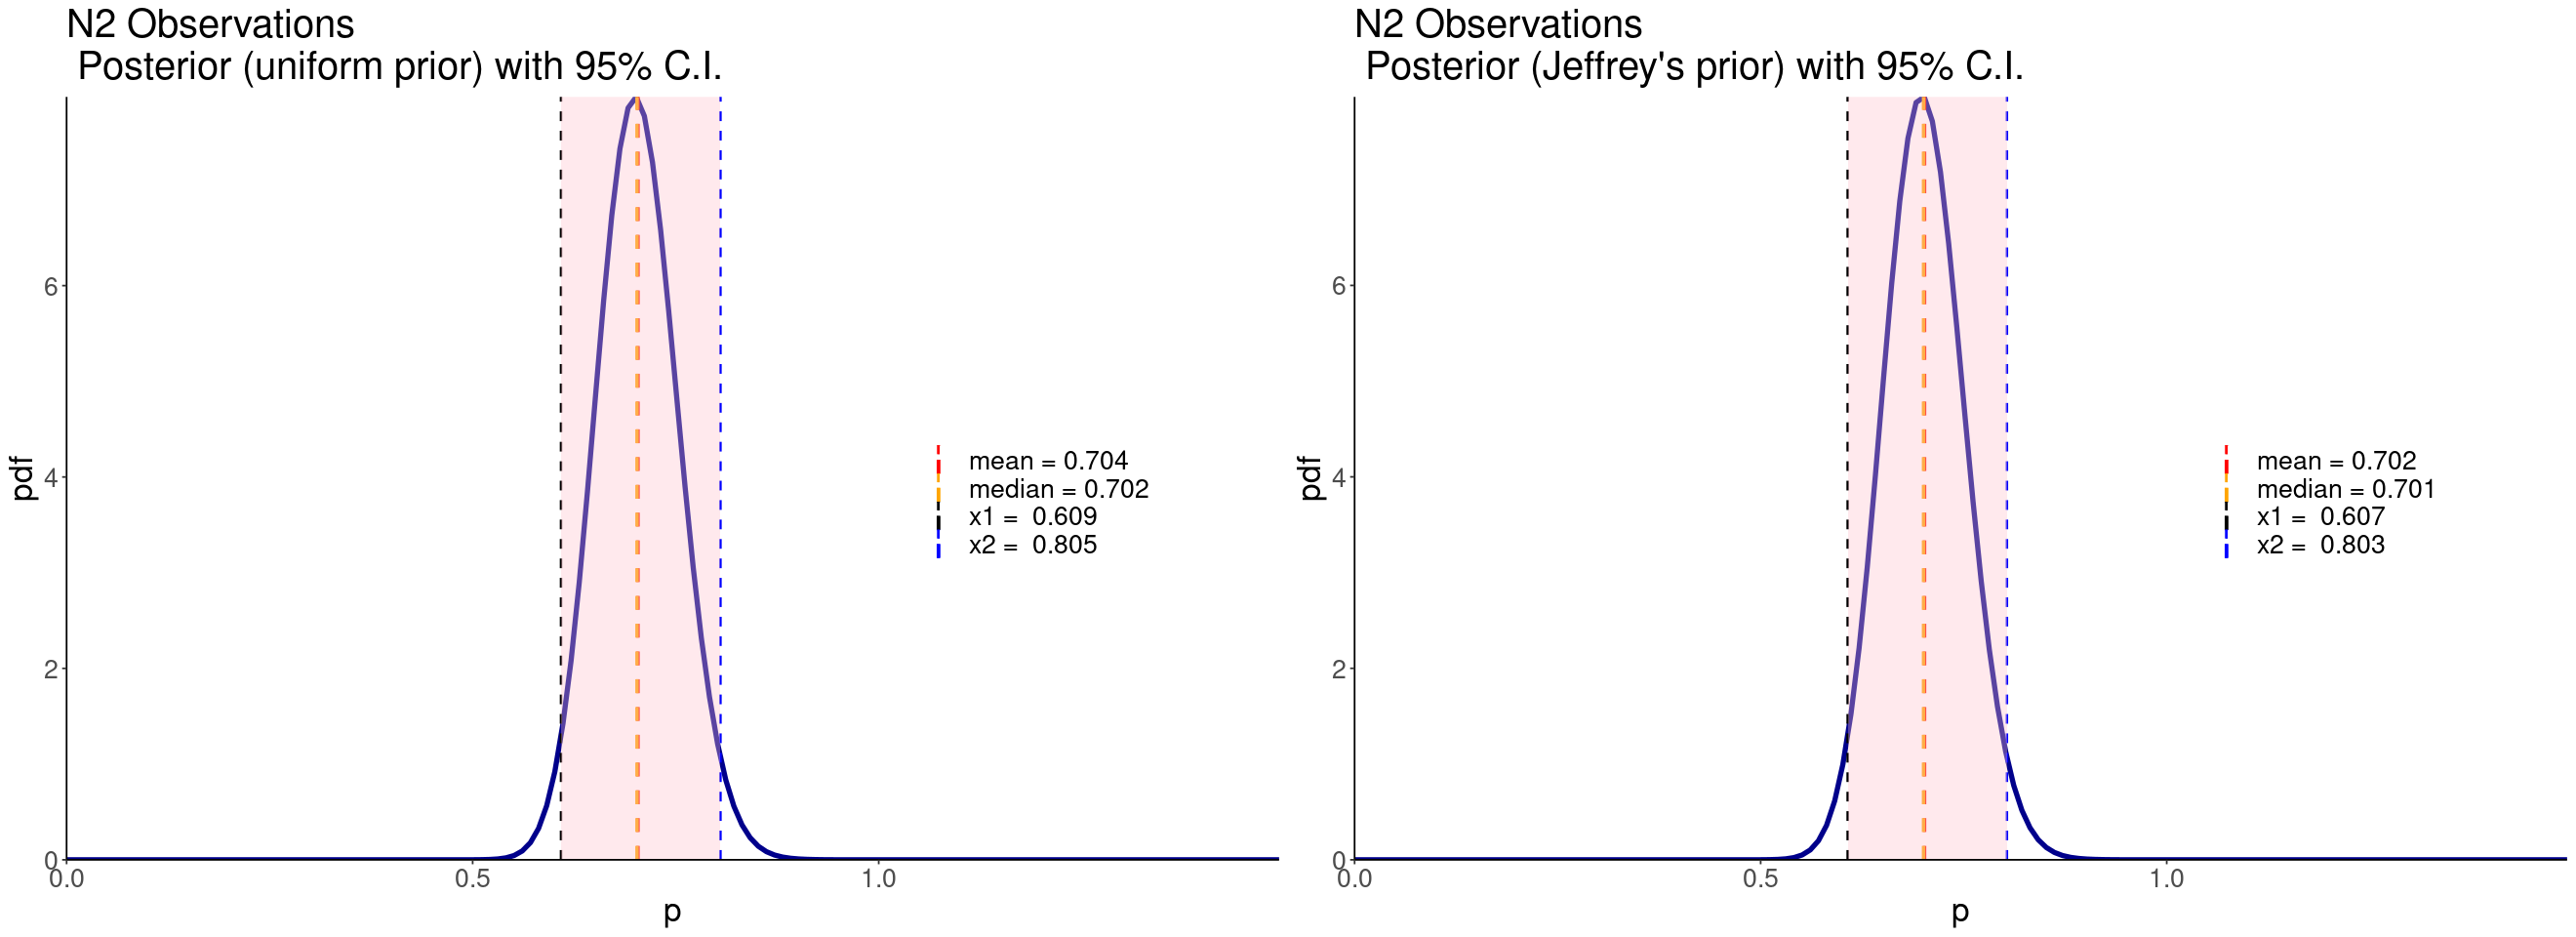

In [6]:
library("ggplot2")
library("ggpubr")


limits <- function(q, alpha, n){
    lower <- qgamma(q, shape = alpha, rate = n)
    upper <- qgamma(1-q, shape = alpha, rate = n)
    return(c(lower, upper))
}

q = 0.025 # quantile for two tailed 95% C.I

unif_cutoffs <- limits(0.025,alpha_unif,len2)
jeff_cutoffs <- limits(0.025,alpha_jeff,len2)


#-------------UNIFORM PRIOR CREDIBIILITY INTERVAL--------------#



unif_post_with_cred <-  ggplot() +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=x, y= uni), color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = unif_mean_the , colour = paste('mean =', round(unif_mean_the, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = unif_median , colour = paste('median =', round(unif_median, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = unif_cutoffs[1], colour = paste('x1 = ', round(unif_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = unif_cutoffs[2],  colour = paste('x2 = ', round(unif_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('N2 Observations \n Posterior (uniform prior) with 95% C.I.')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "black", "blue"),
                     name = "")+
            theme(legend.position=c(0.80, 0.5))+
            geom_ribbon(data = df_prob[1:150, ], aes(y = uni, xmax = unif_cutoffs[2],xmin = unif_cutoffs[1]), fill = 'pink', alpha = 0.35)


#-------------JEFFREY'S PRIOR CREDIBIILITY INTERVAL--------------#


jeff_post_with_cred <-  ggplot() +
            geom_line(data = df_prob[1:150, ], mapping = aes(x=x, y = jef), color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = jeff_mean_the , colour = paste('mean =', round(jeff_mean_the, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = jeff_median , colour = paste('median =', round(jeff_median, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = jeff_cutoffs[1], colour = paste('x1 = ', round(jeff_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = jeff_cutoffs[2],  colour = paste('x2 = ', round(jeff_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('N2 Observations \n Posterior (Jeffrey\'s prior) with 95% C.I.')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "black", "blue"),
                     name = "")+
            theme(legend.position=c(0.80, 0.5))+
            geom_ribbon(data = df_prob[1:150, ], aes(y = jef, xmax = jeff_cutoffs[2],xmin = jeff_cutoffs[1]), fill = 'pink', alpha = 0.35)






cat(paste('\n The 95% C.I  for the posterior given a uniform prior is : [', round(unif_cutoffs[1],3),',', round(unif_cutoffs[2],3), ']'))
cat(paste('\n The 95% C.I for the posterior given Jeffrey\'s prior is : [', round(jeff_cutoffs[1],3),',', round(jeff_cutoffs[2],3), ']'))

ggarrange(unif_post_with_cred, jeff_post_with_cred, nrow = 1, ncol = 2)


# Exercise 3

### a) find the frequentist estimator for p

$$ \hat{p} = \frac{11}{116}$$

### (b) using a Beta(1, 10) prior for p, calculate and posterior distribution P ( p| y)
### &
### (c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
### &
### (d) test the hypotesis
$$H_{0} : p = 0.1 ~~versus~~H_{1} : p \neq 0.1$$
### at 5% level of significance with both the frequentist and bayesian approach

In [7]:
library("ggplot2")
library("ggpubr")

n <- 116
y <- 11


 The median of the posterior with a Beta(1,10) prior is  0.0924 
 The mean for the posterior is  0.0945 
 The variance for the posterior is  7e-04 
 The 95% C.I  for the posterior is : [ 0.05 , 0.151 ]
 FAIL to reject H0: p = 0.1 at the 5% significance level. 

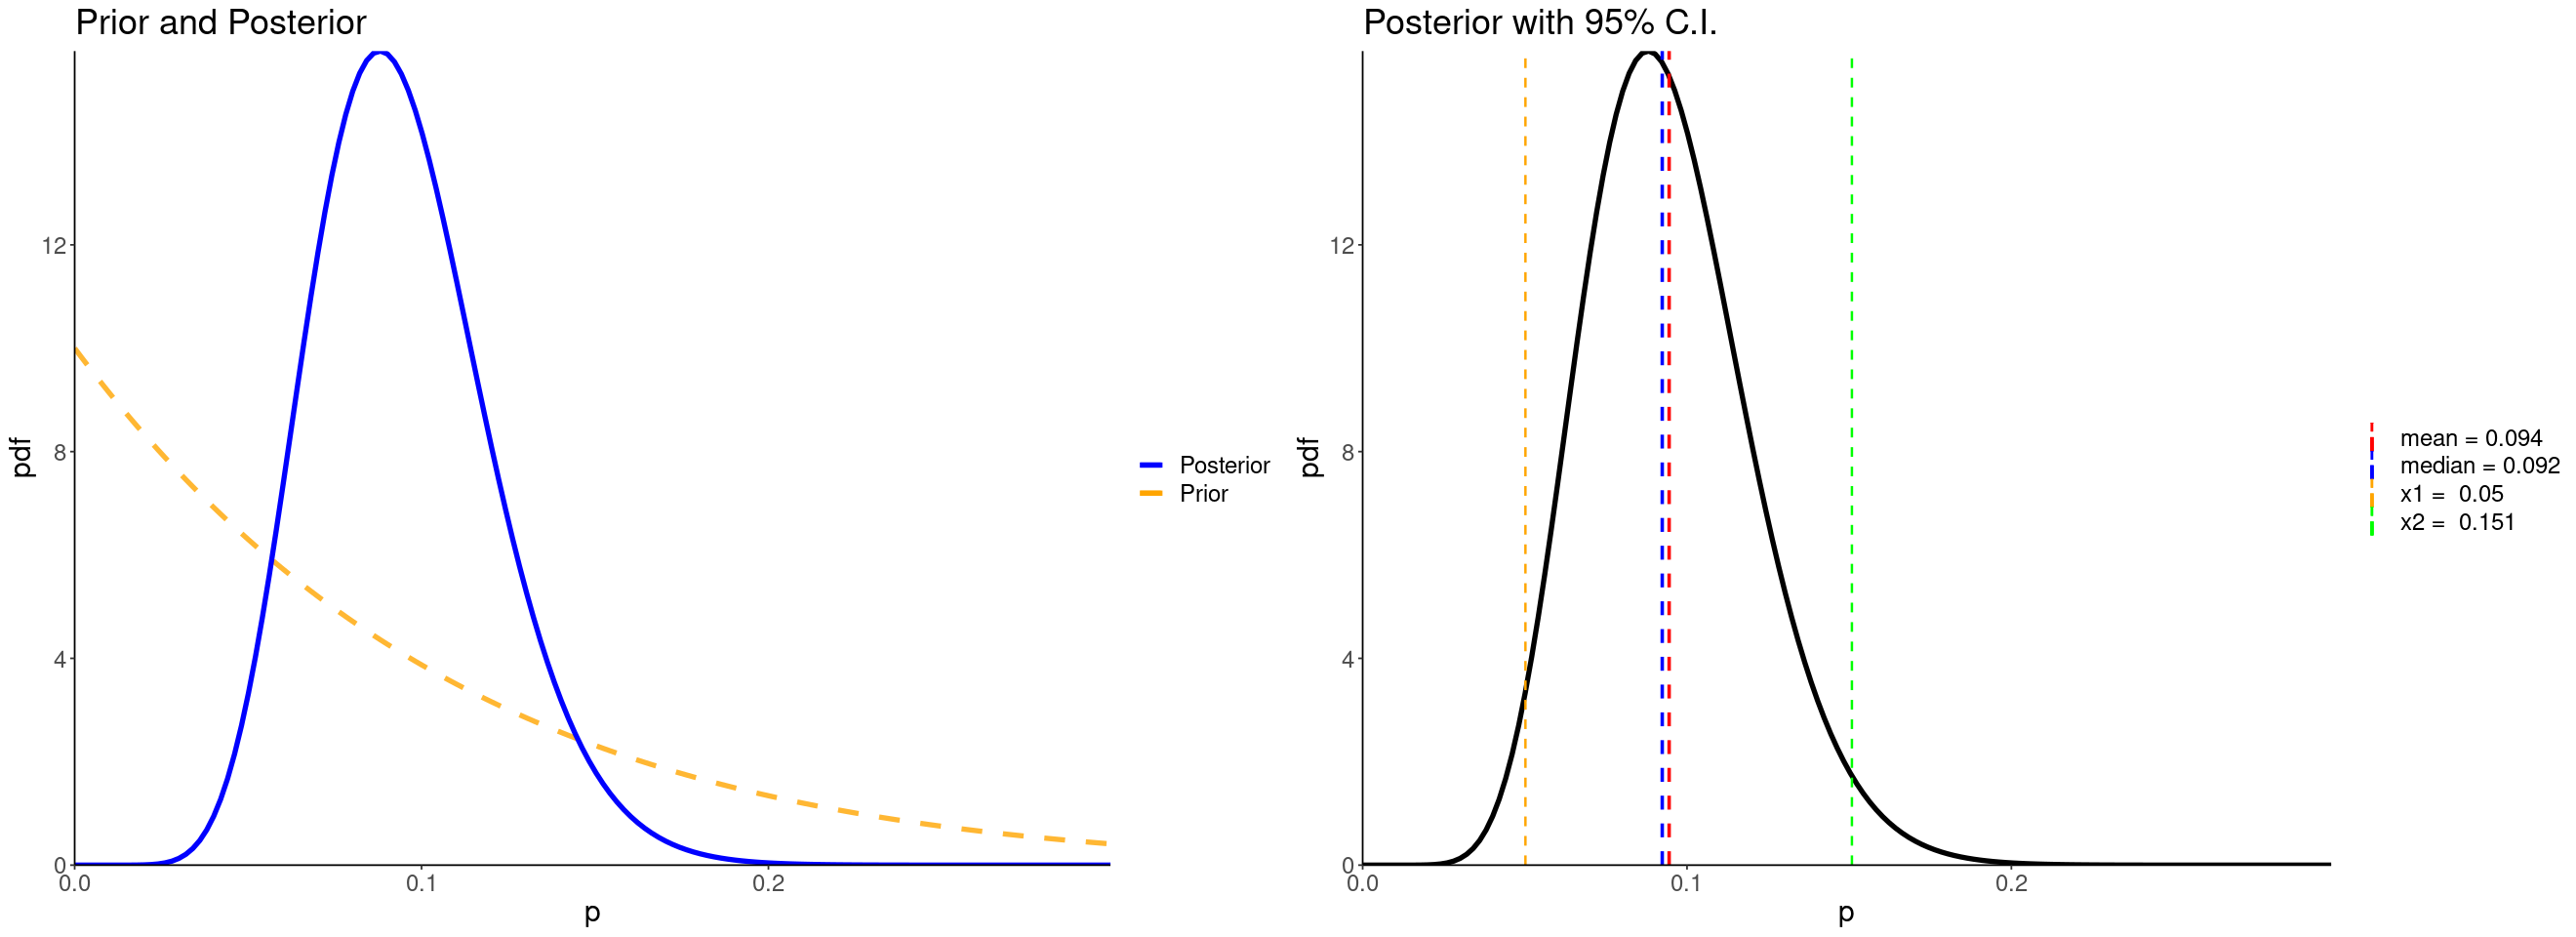

In [8]:
### --------Bayesian-------------####
a <- 1
b <- 10

a_post <- a + y
b_post <- b + n - y

minp <- 0
maxp <- 1
p_step <- 0.002
p <- seq(minp, maxp, length.out = 1/p_step)

prior <- dbeta(p, shape1 = a, shape2 = b)
post <- dbeta(p, shape1 = a_post, shape2 = b_post)

median_X <- qbeta(0.5, shape1 = a_post, shape2 = b_post)
mean_X <- (a_post)/(a_post+b_post)
var_X <- (a_post*b_post)/((a_post+b_post)**2 *(a_post+b_post+1)) 



limits_beta <- function(q, alpha, beta){
    lower <- qbeta(q, shape1 = alpha, shape2 = beta)
    upper <- qbeta(1-q, shape1 = alpha, shape2 = beta)
    return(c(lower, upper))
}

q = 0.025 # quantile for two tailed 95% C.I

cutoffs <- limits_beta(0.025,a_post,b_post)


df_prob_X  <- data.frame(x = p, prior, post)
options(repr.plot.width=22, repr.plot.height=8)

plot <-  ggplot() +
            geom_line(data = df_prob_X[1:150,], mapping = aes(x=p[1:150], y= df_prob_X[1:150,2],colour= 'Prior'), linetype ='dashed', size = 1.5, alpha = 0.8) +
            geom_line(data = df_prob_X[1:150,], mapping = aes(x=p[1:150], y= df_prob_X[1:150,3],colour= 'Posterior'), size = 1.5) +
            ggtitle('Prior and Posterior')+
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c( "blue", "orange"),name = "")



plot1 <-  ggplot() +
            geom_line(data = df_prob_X[1:150,], mapping = aes(x=p[1:150], y= df_prob_X[1:150,3]), size = 1.5) +
            ggtitle('Posterior with 95% C.I.')+
            geom_vline(aes(xintercept = mean_X , colour = paste('mean =', round(mean_X, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = median_X , colour = paste('median =', round(median_X, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = cutoffs[1], colour = paste('x1 = ', round(cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = cutoffs[2],  colour = paste('x2 = ', round(cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "blue", "orange", 'green'), name = "")



ggarrange(plot,plot1, nrow = 1, ncol = 2)


cat(paste('\n The median of the posterior with a Beta(1,10) prior is ', round(median_X,4)), "")
cat(paste('\n The mean for the posterior is ', round(mean_X,4)), "")
cat(paste('\n The variance for the posterior is ', round(var_X,4)), "")
cat(paste('\n The 95% C.I  for the posterior is : [', round(cutoffs[1],3),',', round(cutoffs[2],3), ']'))

cat(paste('\n FAIL to reject H0: p = 0.1 at the 5% significance level. '))


In [9]:
left_cut <- function(left){pbinom(left, n, 0.1)}
right_cut <- function(right){1- pbinom(right, n, 0.1)}

left <- qbinom(0.025, n, 0.1)
right <- qbinom(0.975, n, 0.1)

cat('\n The "actual" values of the cut are (',left,',', right,') and give an area of', left_cut(left) + right_cut(right))
cat('\n We want to get as close as possible to 0.05')

for (i in seq(-2, 2, 1)){
   cat('\n The cuts (',left-i,',', right,') give an area of', left_cut(left-i) + right_cut(right))
   cat('\n The cuts (',left,',', right-i,') give an area of', left_cut(left) + right_cut(right-i))
   cat('\n The cuts (',left-i,',', right-i,') give an area of', left_cut(left-i) + right_cut(right-i))
   cat('\n The cuts (',left+i,',', right-i,') give an area of', left_cut(left+i) + right_cut(right-i))
   cat('\n The cuts (',left+i,',', right+i,') give an area of', left_cut(left+i) + right_cut(right+i))
    
}

cat('\n It would appear as if the best we can get without going over the chosen value is to choose the cuts (5,18).')



 The "actual" values of the cut are ( 6 , 18 ) and give an area of 0.07002392
 We want to get as close as possible to 0.05
 The cuts ( 8 , 18 ) give an area of 0.1906446
 The cuts ( 6 , 20 ) give an area of 0.05376501
 The cuts ( 8 , 20 ) give an area of 0.1743857
 The cuts ( 4 , 20 ) give an area of 0.0129157
 The cuts ( 4 , 16 ) give an area of 0.07777722
 The cuts ( 7 , 18 ) give an area of 0.1180056
 The cuts ( 6 , 19 ) give an area of 0.05945856
 The cuts ( 7 , 19 ) give an area of 0.1074403
 The cuts ( 5 , 19 ) give an area of 0.03197812
 The cuts ( 5 , 17 ) give an area of 0.06097895
 The cuts ( 6 , 18 ) give an area of 0.07002392
 The cuts ( 6 , 18 ) give an area of 0.07002392
 The cuts ( 6 , 18 ) give an area of 0.07002392
 The cuts ( 6 , 18 ) give an area of 0.07002392
 The cuts ( 6 , 18 ) give an area of 0.07002392
 The cuts ( 5 , 18 ) give an area of 0.04254348
 The cuts ( 6 , 17 ) give an area of 0.08845939
 The cuts ( 5 , 17 ) give an area of 0.06097895
 The cuts ( 7 , 1


 FAIL to reject the null hypothesis at the 5% level of significance.

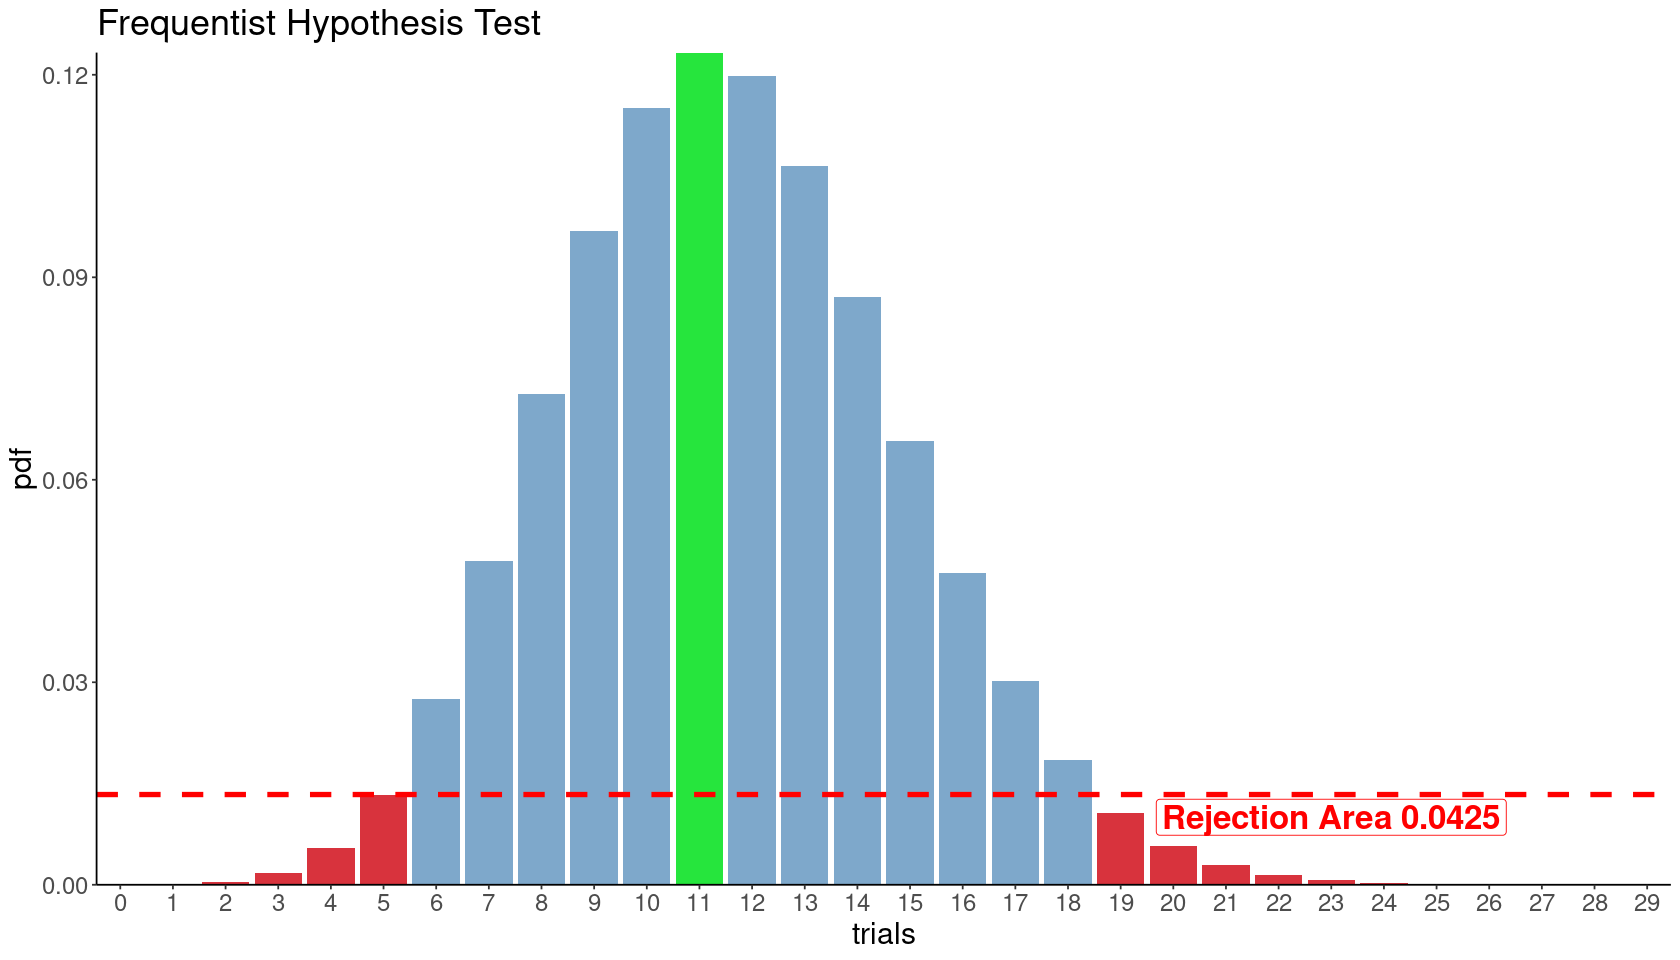

In [10]:
left <- 5
right <- 19

low <- pbinom(left, n, 0.1)
high <- pbinom(right, n, 0.1)

xs <- seq(0, n, 1)
cum <- function(xs){pbinom(xs, n, 0.1)}
distr <- function(xs){dbinom(xs, n, 0.1)}


annotation_freq1 <- data.frame(
   x = 23,
   y = 0.01,
   label = paste('Rejection Area', round(left_cut(5)+ right_cut(18),4))
)


options(repr.plot.height = 8, repr.plot.width = 14)

df_fhtest <- data.frame(x = xs, pdf = distr(xs), cdf = cum(xs))




test_freq <- ggplot(data=df_fhtest[1:30,], aes(x=xs[1:30], y=pdf[1:30]))+
        ggtitle('Frequentist Hypothesis Test')+
        geom_bar(stat="identity", fill="steelblue", alpha = 0.7)+
        geom_bar(aes(x=xs[1:6], y=pdf[1:6]),data=df_fhtest[1:6,], stat="identity", fill="red", alpha = 0.7)+
        geom_bar(aes(x=xs[20:30], y=pdf[1:11]),data=df_fhtest[20:30,], stat="identity", fill="red", alpha = 0.7)+
        geom_bar(aes(x=xs[12:12], y=pdf[1:1]),data=df_fhtest[12:12,], stat="identity", fill="green", alpha = 0.7)+
        geom_hline(aes(yintercept = distr(5)), size = 1.5, color = 'red', linetype = 'dashed')+
        theme_classic()+
        scale_x_continuous(name = 'trials', expand = c(0,0), breaks = seq(0,30,1))+
        scale_y_continuous(name = 'pdf', expand = c(0,0))+
        theme(text = element_text(size = 18))+
        geom_label(data=annotation_freq1, aes( x=x, y=y, label=label),                 , 
           color="red", 
           size=7 , angle=0, fontface="bold" )


test_freq

cat('\n FAIL to reject the null hypothesis at the 5% level of significance.')


### e)  find the frequentist estimator for p

$$ \hat{p} = \frac{9}{165}$$

### (f)find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.
### &
### (g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
### &
### (h) test the hypotesis
$$H_{0} : p = 0.1 ~~versus~~H_{1} : p \neq 0.1$$
### at 5% level of significance with both the frequentist and bayesian approach

In [11]:
n <- 165
y <- 9


 The median of the posterior with a Beta(1,10) prior is  0.0551 
 The mean for the posterior is  0.0568 
 The variance for the posterior is  3e-04 
 The 95% C.I  for the posterior is : [ 0.028 , 0.095 ]
 Reject H0: p = 0.1 at the 5% significance level. 

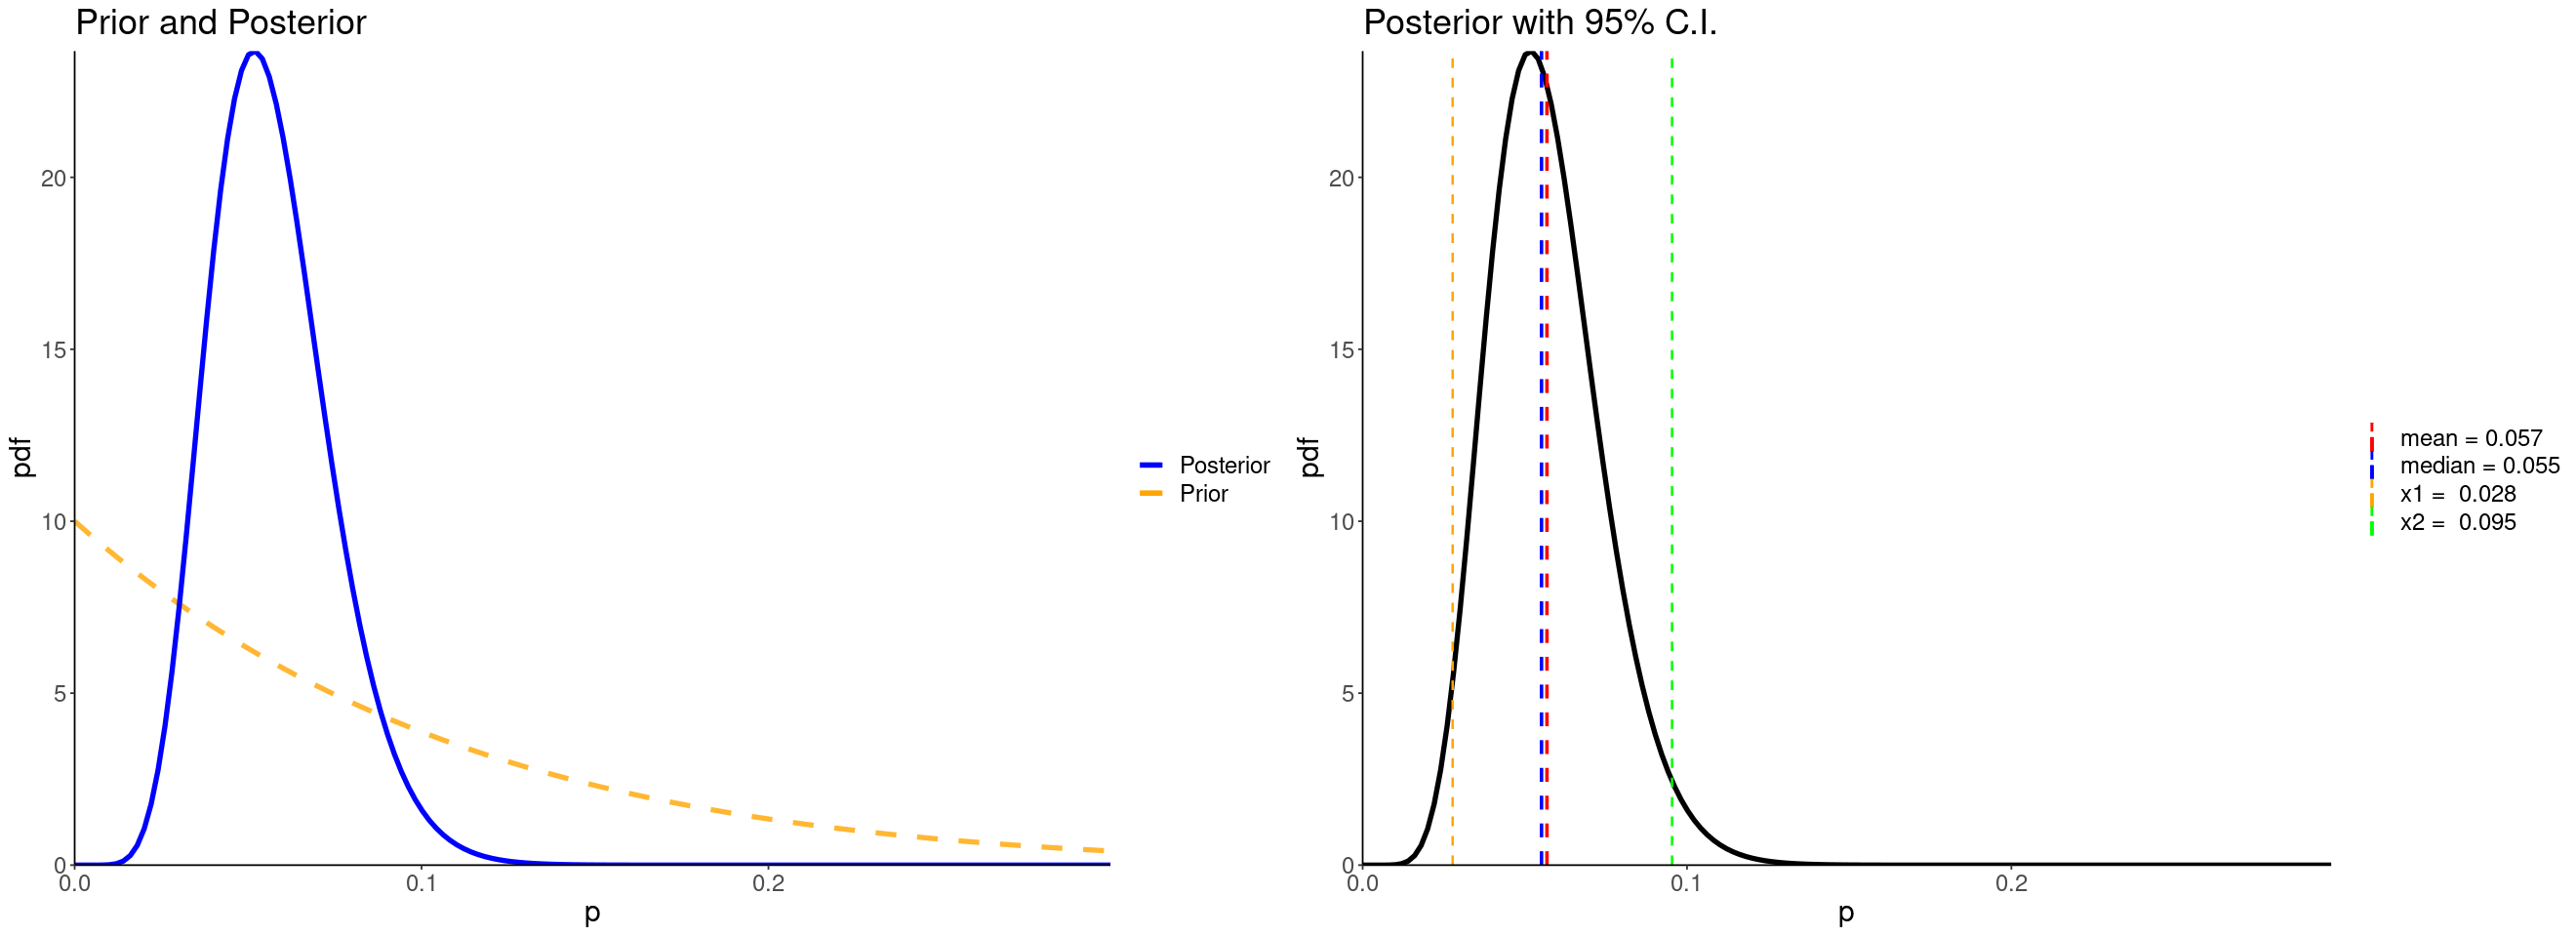

In [12]:
### --------Bayesian-------------####
a <- 1
b <- 10

a_post <- a + y
b_post <- b + n - y

minp <- 0
maxp <- 1
p_step <- 0.002
p <- seq(minp, maxp, length.out = 1/p_step)

prior <- dbeta(p, shape1 = a, shape2 = b)
post <- dbeta(p, shape1 = a_post, shape2 = b_post)

median_X <- qbeta(0.5, shape1 = a_post, shape2 = b_post)
mean_X <- (a_post)/(a_post+b_post)
var_X <- (a_post*b_post)/((a_post+b_post)**2 *(a_post+b_post+1)) 



limits_beta <- function(q, alpha, beta){
    lower <- qbeta(q, shape1 = alpha, shape2 = beta)
    upper <- qbeta(1-q, shape1 = alpha, shape2 = beta)
    return(c(lower, upper))
}

q = 0.025 # quantile for two tailed 95% C.I

cutoffs <- limits_beta(0.025,a_post,b_post)


df_prob_X  <- data.frame(x = p, prior, post)
options(repr.plot.width=22, repr.plot.height=8)

plot <-  ggplot() +
            geom_line(data = df_prob_X[1:150,], mapping = aes(x=p[1:150], y= df_prob_X[1:150,2],colour= 'Prior'), linetype ='dashed', size = 1.5, alpha = 0.8) +
            geom_line(data = df_prob_X[1:150,], mapping = aes(x=p[1:150], y= df_prob_X[1:150,3],colour= 'Posterior'), size = 1.5) +
            ggtitle('Prior and Posterior')+
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c( "blue", "orange"),name = "")



plot1 <-  ggplot() +
            geom_line(data = df_prob_X[1:150,], mapping = aes(x=p[1:150], y= df_prob_X[1:150,3]), size = 1.5) +
            ggtitle('Posterior with 95% C.I.')+
            geom_vline(aes(xintercept = mean_X , colour = paste('mean =', round(mean_X, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = median_X , colour = paste('median =', round(median_X, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = cutoffs[1], colour = paste('x1 = ', round(cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = cutoffs[2],  colour = paste('x2 = ', round(cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "blue", "orange", 'green'), name = "")



ggarrange(plot,plot1, nrow = 1, ncol = 2)


cat(paste('\n The median of the posterior with a Beta(1,10) prior is ', round(median_X,4)), "")
cat(paste('\n The mean for the posterior is ', round(mean_X,4)), "")
cat(paste('\n The variance for the posterior is ', round(var_X,4)), "")
cat(paste('\n The 95% C.I  for the posterior is : [', round(cutoffs[1],3),',', round(cutoffs[2],3), ']'))

cat(paste('\n Reject H0: p = 0.1 at the 5% significance level. '))



 The median of the posterior with a Beta(12,115) prior is  0.0709 
 The mean for the posterior is  0.0719 
 The variance for the posterior is  2e-04 
 The 95% C.I  for the posterior is : [ 0.045 , 0.104 ]
 FAIL to reject H0: p = 0.1 at the 5% significance level. 

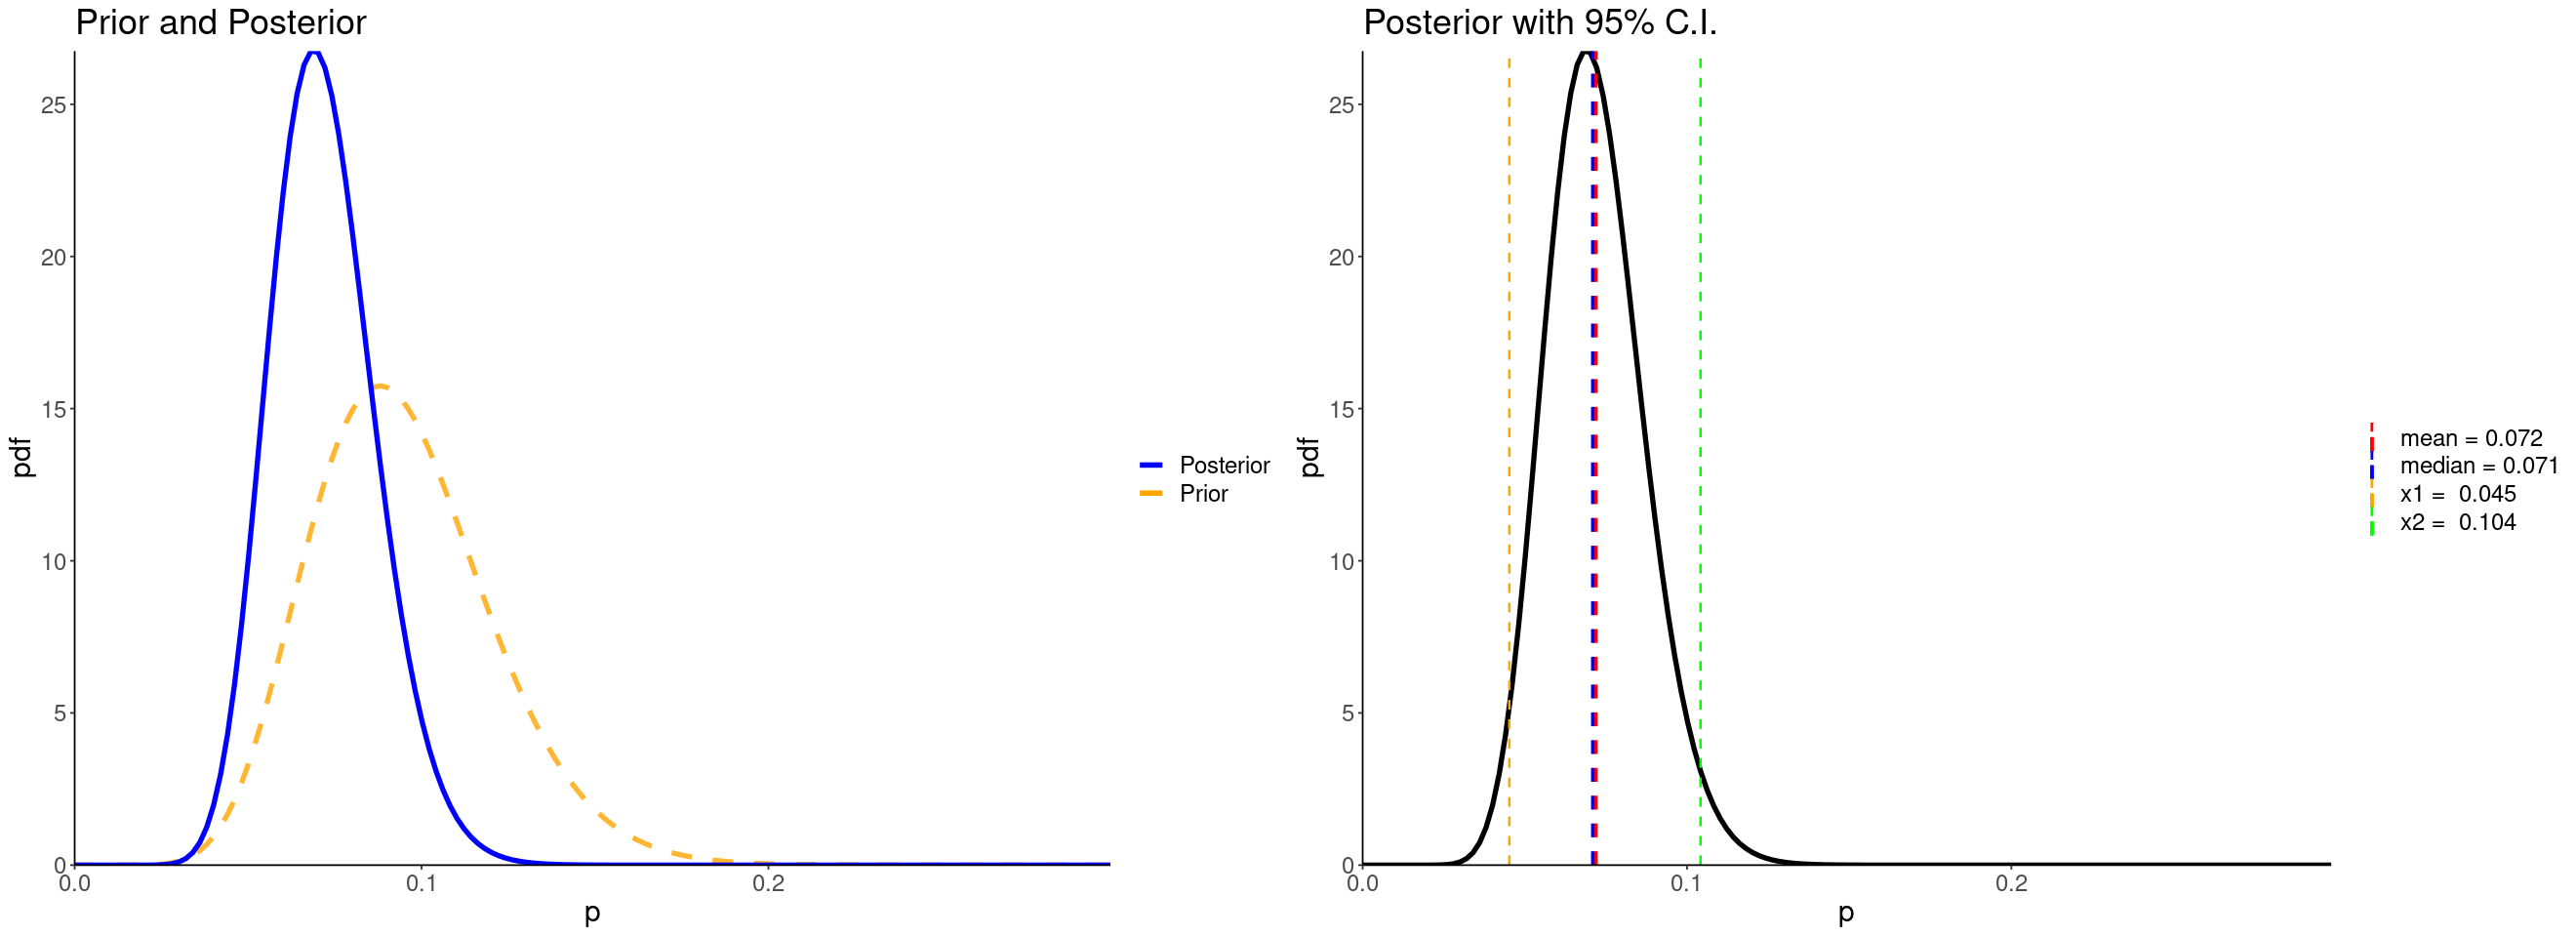

In [13]:
### --------Bayesian-------------####
a <- 12
b <- 115

a_post <- a + y
b_post <- b + n - y

minp <- 0
maxp <- 1
p_step <- 0.002
p <- seq(minp, maxp, length.out = 1/p_step)

prior <- dbeta(p, shape1 = a, shape2 = b)
post <- dbeta(p, shape1 = a_post, shape2 = b_post)

median_X <- qbeta(0.5, shape1 = a_post, shape2 = b_post)
mean_X <- (a_post)/(a_post+b_post)
var_X <- (a_post*b_post)/((a_post+b_post)**2 *(a_post+b_post+1)) 



limits_beta <- function(q, alpha, beta){
    lower <- qbeta(q, shape1 = alpha, shape2 = beta)
    upper <- qbeta(1-q, shape1 = alpha, shape2 = beta)
    return(c(lower, upper))
}

q = 0.025 # quantile for two tailed 95% C.I

cutoffs <- limits_beta(0.025,a_post,b_post)


df_prob_X  <- data.frame(x = p, prior, post)
options(repr.plot.width=22, repr.plot.height=8)

plot <-  ggplot() +
            geom_line(data = df_prob_X[1:150,], mapping = aes(x=p[1:150], y= df_prob_X[1:150,2],colour= 'Prior'), linetype ='dashed', size = 1.5, alpha = 0.8) +
            geom_line(data = df_prob_X[1:150,], mapping = aes(x=p[1:150], y= df_prob_X[1:150,3],colour= 'Posterior'), size = 1.5) +
            ggtitle('Prior and Posterior')+
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c( "blue", "orange"),name = "")



plot1 <-  ggplot() +
            geom_line(data = df_prob_X[1:150,], mapping = aes(x=p[1:150], y= df_prob_X[1:150,3]), size = 1.5) +
            ggtitle('Posterior with 95% C.I.')+
            geom_vline(aes(xintercept = mean_X , colour = paste('mean =', round(mean_X, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = median_X , colour = paste('median =', round(median_X, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = cutoffs[1], colour = paste('x1 = ', round(cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = cutoffs[2],  colour = paste('x2 = ', round(cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "blue", "orange", 'green'), name = "")



ggarrange(plot,plot1, nrow = 1, ncol = 2)


cat(paste('\n The median of the posterior with a Beta(12,115) prior is ', round(median_X,4)), "")
cat(paste('\n The mean for the posterior is ', round(mean_X,4)), "")
cat(paste('\n The variance for the posterior is ', round(var_X,4)), "")
cat(paste('\n The 95% C.I  for the posterior is : [', round(cutoffs[1],3),',', round(cutoffs[2],3), ']'))

cat(paste('\n FAIL to reject H0: p = 0.1 at the 5% significance level. '))


In [14]:
left_cut <- function(left){pbinom(left, n, 0.1)}
right_cut <- function(right){1- pbinom(right, n, 0.1)}

left <- qbinom(0.025, n, 0.1)
right <- qbinom(0.975, n, 0.1)

cat('\n The "actual" values of the cut are (',left,',', right,') and give an area of', left_cut(left) + right_cut(right))
cat('\n We want to get as close as possible to 0.05')

for (i in seq(-2, 2, 1)){
   cat('\n The cuts (',left-i,',', right,') give an area of', left_cut(left-i) + right_cut(right))
   cat('\n The cuts (',left,',', right-i,') give an area of', left_cut(left) + right_cut(right-i))
   cat('\n The cuts (',left-i,',', right-i,') give an area of', left_cut(left-i) + right_cut(right-i))
   cat('\n The cuts (',left+i,',', right-i,') give an area of', left_cut(left+i) + right_cut(right-i))
   cat('\n The cuts (',left+i,',', right+i,') give an area of', left_cut(left+i) + right_cut(right+i))
    
}

cat('\n It would appear as if the best we can get without going over the chosen value is to choose the cuts (9,25).')


 The "actual" values of the cut are ( 9 , 24 ) and give an area of 0.0511155
 We want to get as close as possible to 0.05
 The cuts ( 11 , 24 ) give an area of 0.1158416
 The cuts ( 9 , 26 ) give an area of 0.03481639
 The cuts ( 11 , 26 ) give an area of 0.09954245
 The cuts ( 7 , 26 ) give an area of 0.01275282
 The cuts ( 7 , 22 ) give an area of 0.0700786
 The cuts ( 10 , 24 ) give an area of 0.07634338
 The cuts ( 9 , 25 ) give an area of 0.04091766
 The cuts ( 10 , 25 ) give an area of 0.06614554
 The cuts ( 8 , 25 ) give an area of 0.02636312
 The cuts ( 8 , 23 ) give an area of 0.05283411
 The cuts ( 9 , 24 ) give an area of 0.0511155
 The cuts ( 9 , 24 ) give an area of 0.0511155
 The cuts ( 9 , 24 ) give an area of 0.0511155
 The cuts ( 9 , 24 ) give an area of 0.0511155
 The cuts ( 9 , 24 ) give an area of 0.0511155
 The cuts ( 8 , 24 ) give an area of 0.03656096
 The cuts ( 9 , 23 ) give an area of 0.06738865
 The cuts ( 8 , 23 ) give an area of 0.05283411
 The cuts ( 10 ,


 Reject the null hypothesis at the 5% level of significance.

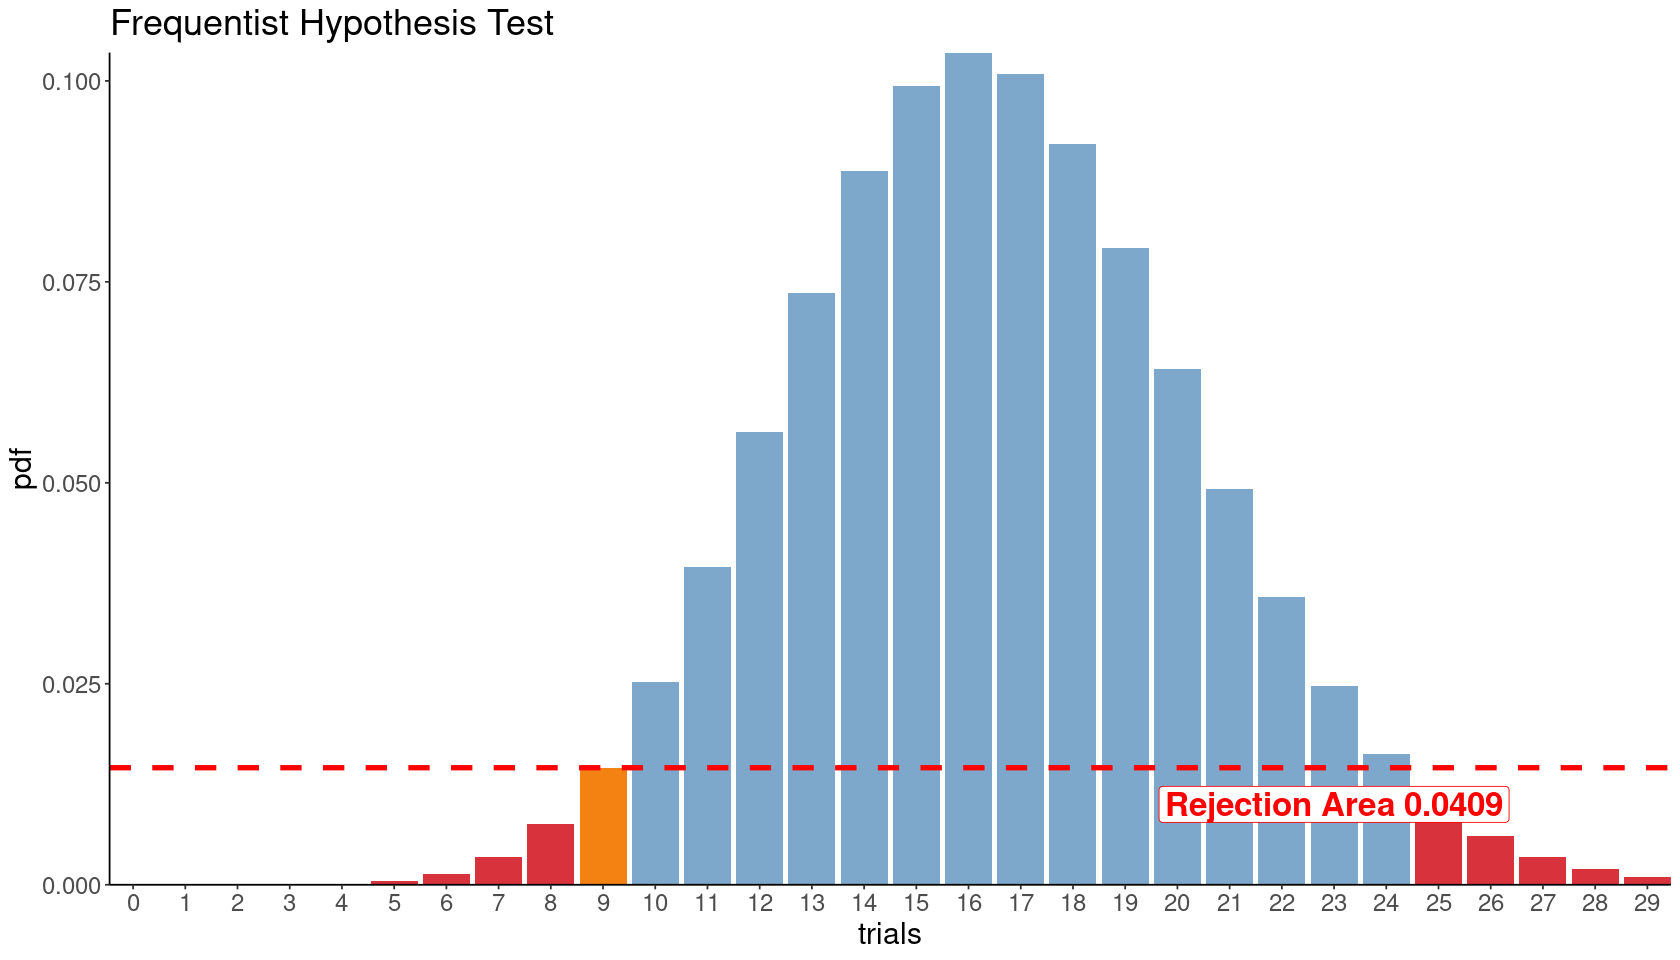

In [15]:
left <- 9
right <- 25

low <- pbinom(left, n, 0.1)
high <- pbinom(right, n, 0.1)

xs <- seq(0, n, 1)
cum <- function(xs){pbinom(xs, n, 0.1)}
distr <- function(xs){dbinom(xs, n, 0.1)}


annotation_freq1 <- data.frame(
   x = 23,
   y = 0.01,
   label = paste('Rejection Area', round(left_cut(9)+ right_cut(25),4))
)


options(repr.plot.height = 8, repr.plot.width = 14)

df_fhtest <- data.frame(x = xs, pdf = distr(xs), cdf = cum(xs))

test_freq <- ggplot(data=df_fhtest[1:30,], aes(x=xs[1:30], y=pdf[1:30]))+
        ggtitle('Frequentist Hypothesis Test')+
        geom_bar(stat="identity", fill="steelblue", alpha = 0.7)+
        geom_bar(aes(x=xs[1:10], y=pdf[1:10]),data=df_fhtest[1:10,], stat="identity", fill="red", alpha = 0.7)+
        geom_bar(aes(x=xs[26:30], y=pdf[1:5]),data=df_fhtest[26:30,], stat="identity", fill="red", alpha = 0.7)+
        geom_bar(aes(x=xs[10:10], y=pdf[1:1]),data=df_fhtest[10:10,], stat="identity", fill="orange", alpha = 0.7)+
        geom_hline(aes(yintercept = distr(9)), size = 1.5, color = 'red', linetype = 'dashed')+
        theme_classic()+
        scale_x_continuous(name = 'trials', expand = c(0,0), breaks = seq(0,30,1))+
        scale_y_continuous(name = 'pdf', expand = c(0,0))+
        theme(text = element_text(size = 18))+
        geom_label(data=annotation_freq1, aes( x=x, y=y, label=label),                 , 
           color="red", 
           size=7 , angle=0, fontface="bold" )


test_freq

cat('\n Reject the null hypothesis at the 5% level of significance.')

